In [0]:
#Instalacion del paquete para el llamado de los repositorios pertenecientes al repositorio
!pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3b/07/1252560194df2b4fad1cb3c46081b948331c63eb1bb0b97620d508d12a53/ucimlrepo-0.0.7-py3-none-any.whl.metadata
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import RobustScaler, StandardScaler, PowerTransformer, OneHotEncoder, OrdinalEncoder, FunctionTransformer, Normalizer
from scipy.stats.mstats import winsorize
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import normalize

from sklearn.model_selection import cross_validate, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn. metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize

import mlflow
from mlflow.models import infer_signature
from mlflow.tracking.client import MlflowClient
import mlflow.pyfunc

In [0]:
#Se identifica el dataset en funcion del id
wine = fetch_ucirepo(id=109) 

#Se obtienen los valores referentes tanto a las caracteristicas como a la variable dependiente
data_features = wine.data.features 
data_target = wine.data.targets 

In [0]:
#Se crea una copia del conjunto de datos de variables, la copia se genera para que el dataframe original no sea mutable
df = data_features.copy()

#Se integra la columna de la variable a predecir al df principal para facilitar el analisis descriptivo
df['Target'] = data_target['class']

In [0]:
df.display()

Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,Target
14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050,1
13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185,1
14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480,1
13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1
14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290,1
14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045,1
13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [0]:
df.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,Target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


No hay valores nulos, por lo cual no es necesario llevar a cabo algun metodo de imputacion.

Todas las variables son numericas, por ende, no es necesario aplicar tecnicas como one-hot encoder o ordinal encoder, esto reduce el calculo de matrices de tipo sparce, debido a esto el procesamiento y posterior entrenamiento sera mas rapido.

La desviacion estandar en la mayoria de las variables es muy baja, eso significa que existe una intravarianza muy pequeña por caracteristica, se debe validar con los diagramas de dispersion que tal esta la varianza entre caracteristicas.

Algunas variables tienen frecuencias que pueden denotar en posible registro de outliers o datos anomalos, de igual forma se validara con los diagramas de caja.


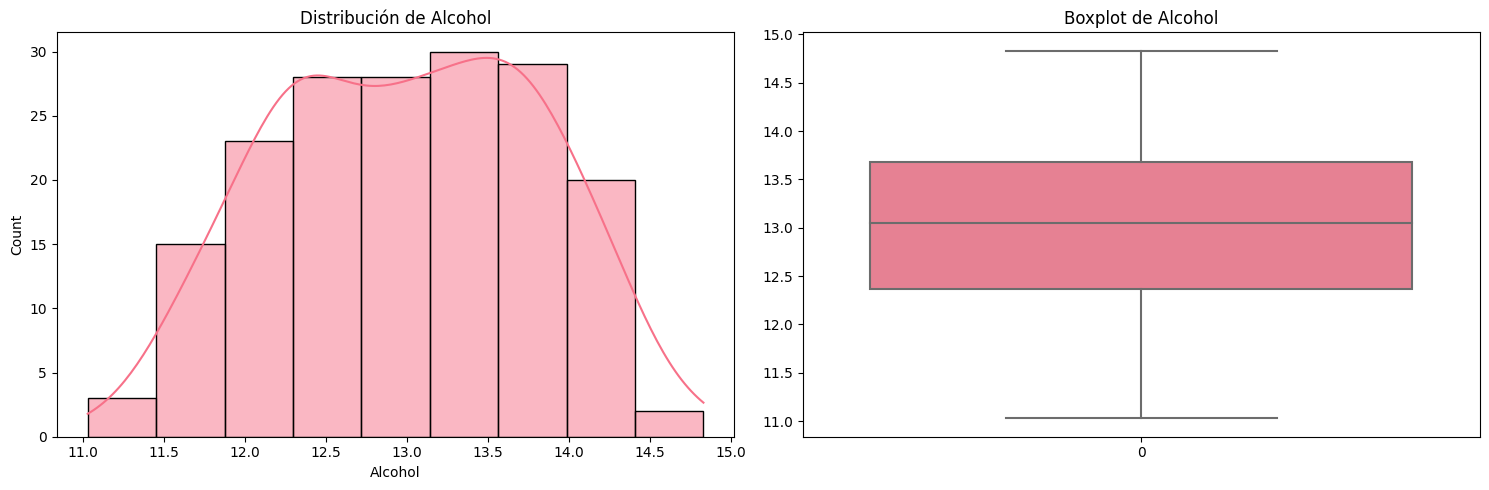

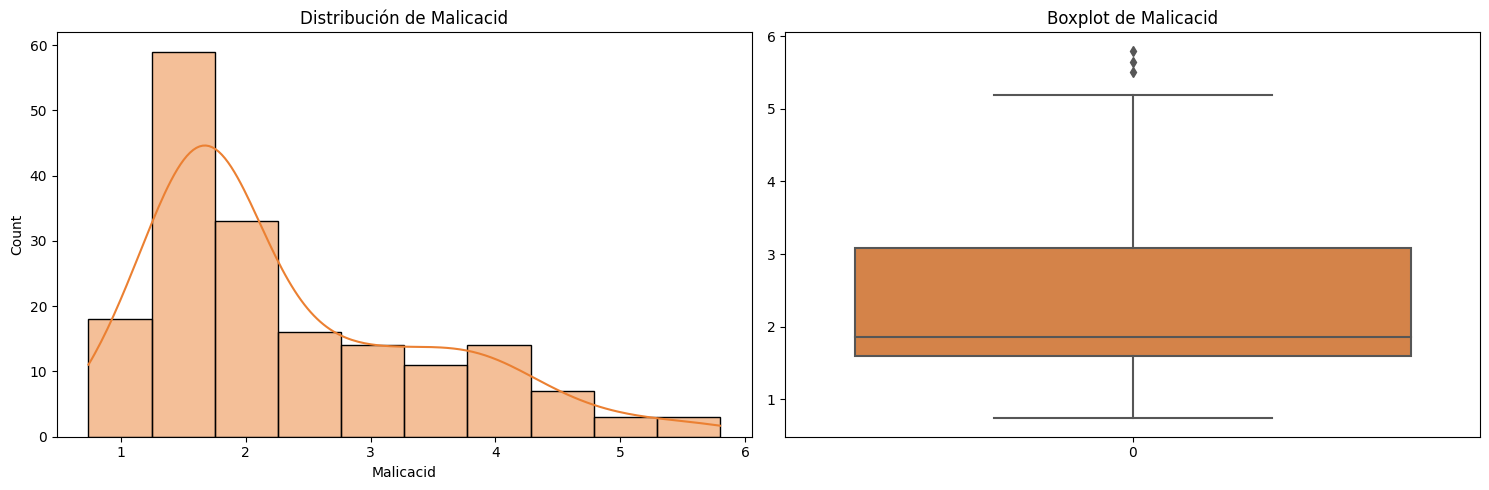

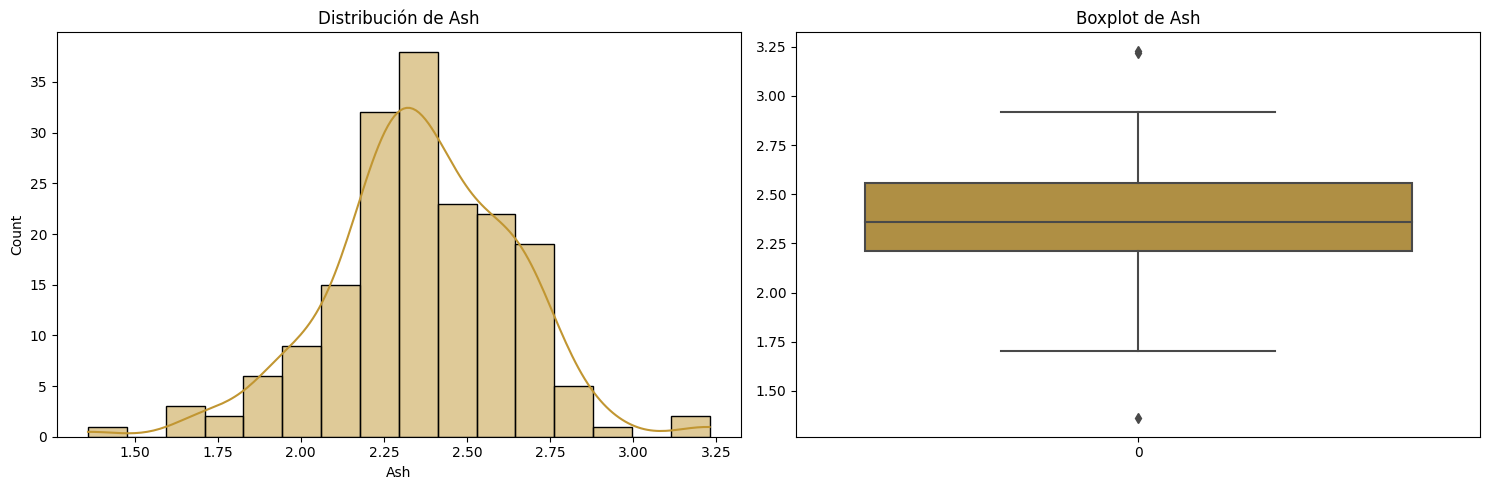

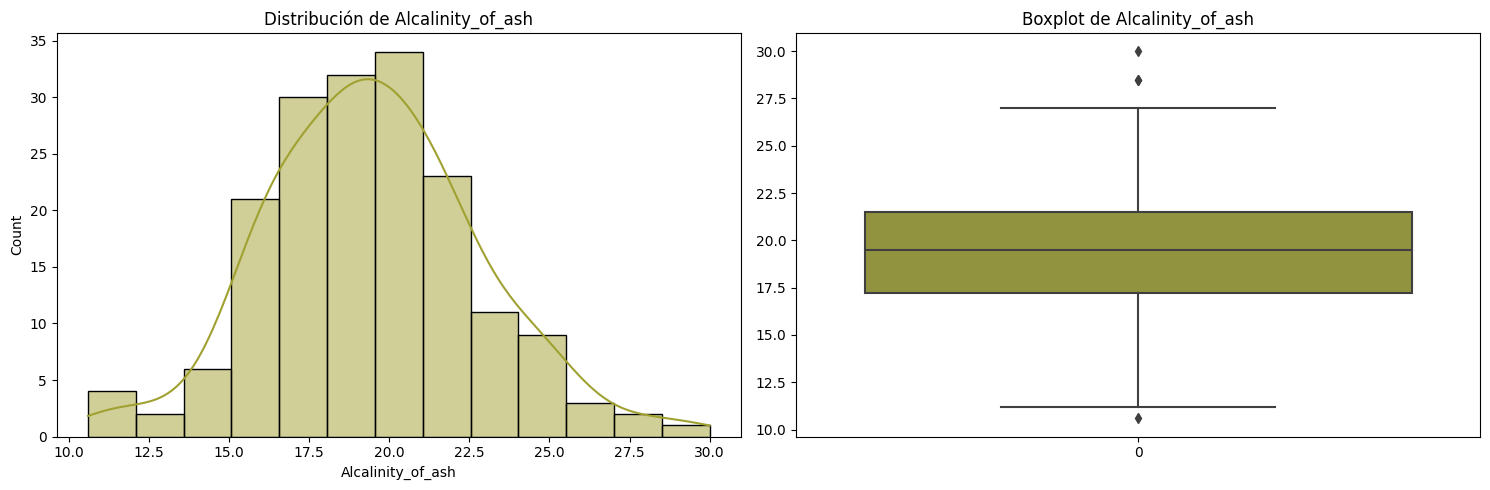

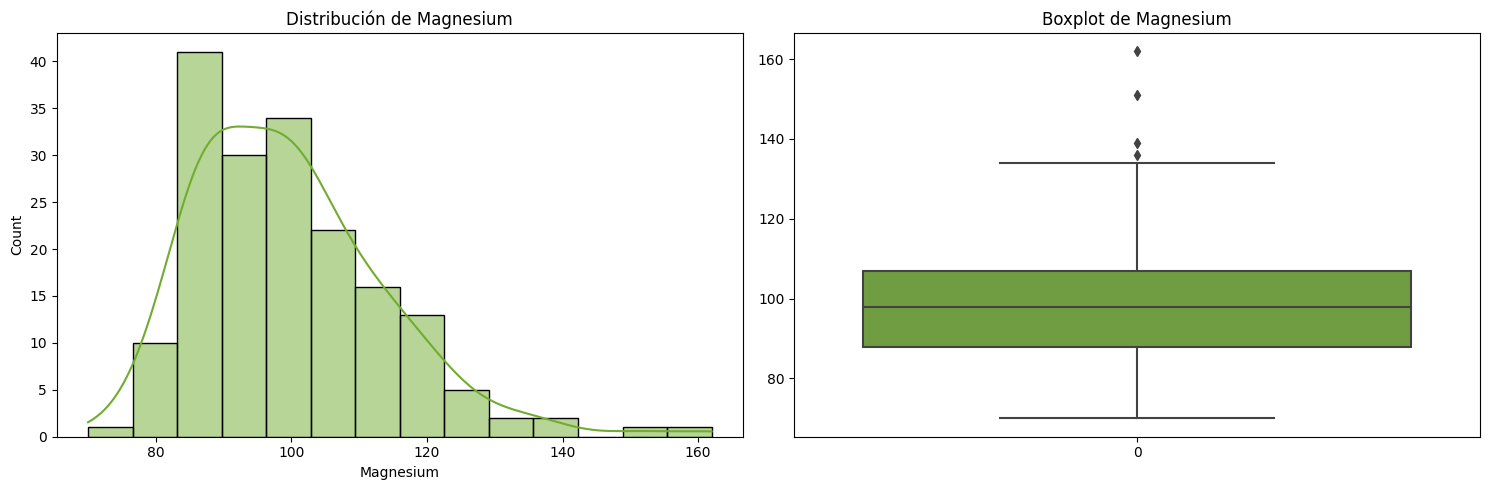

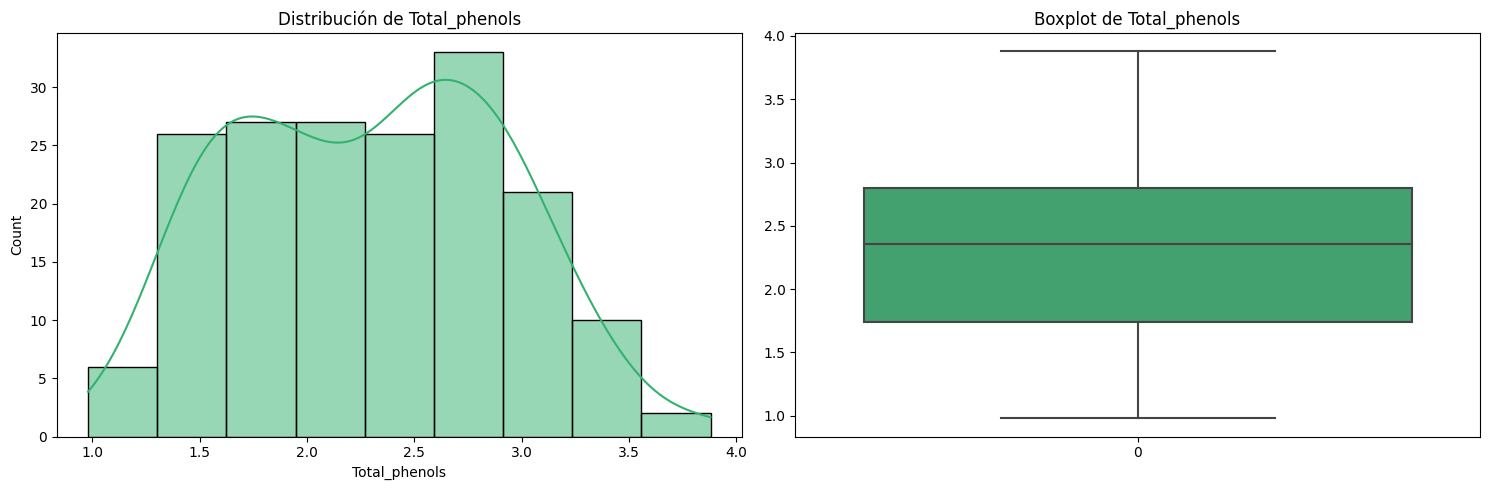

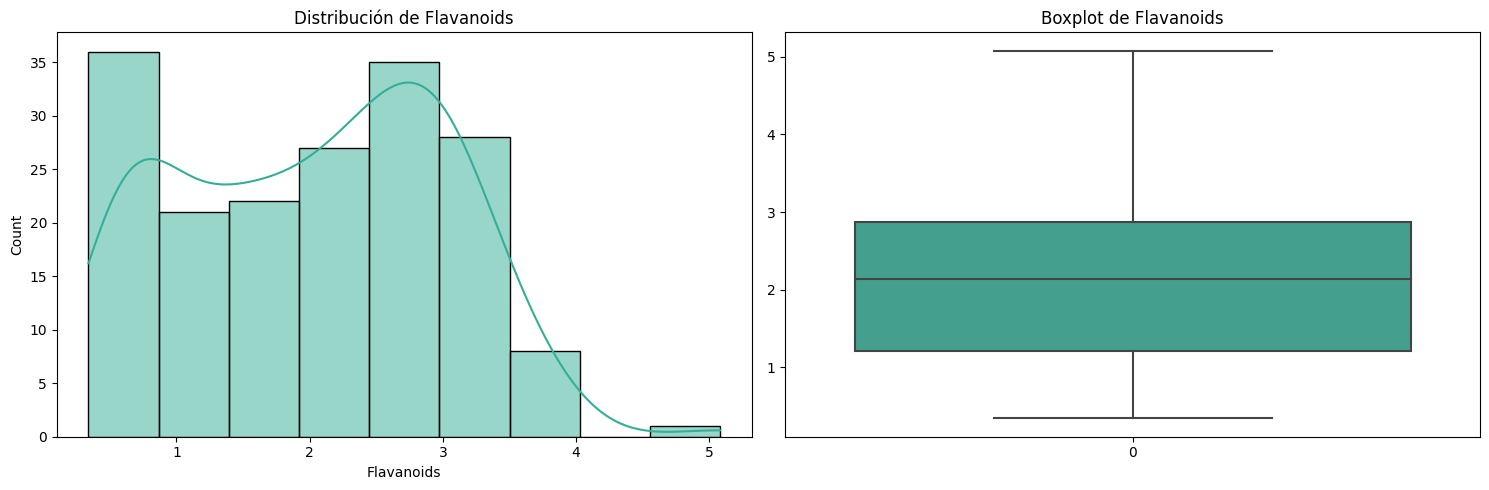

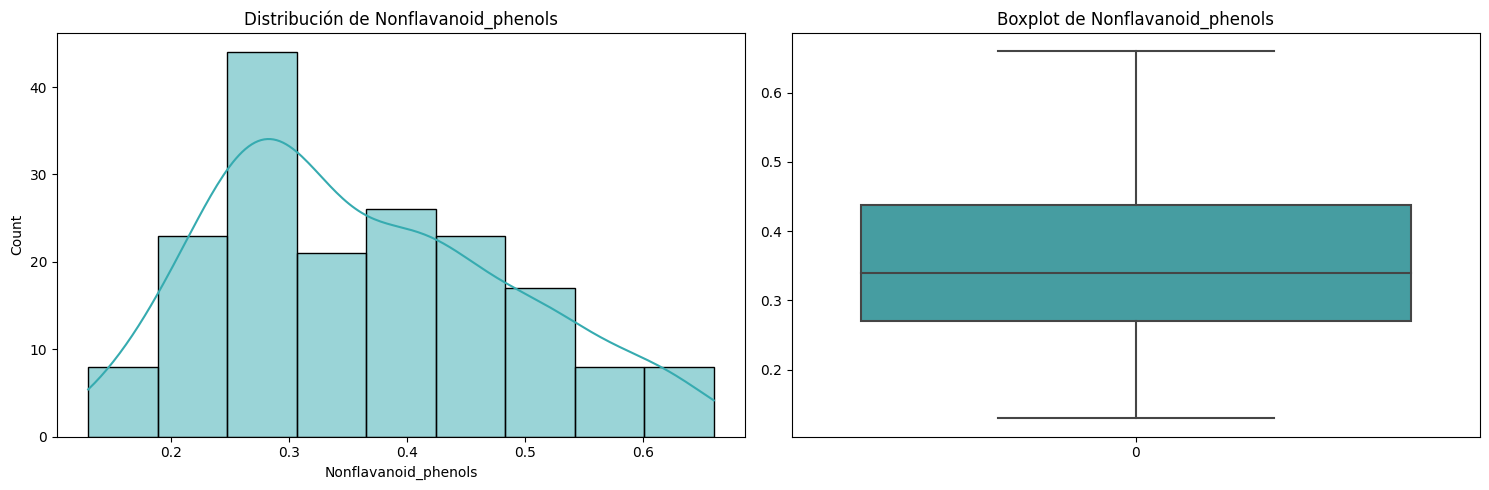

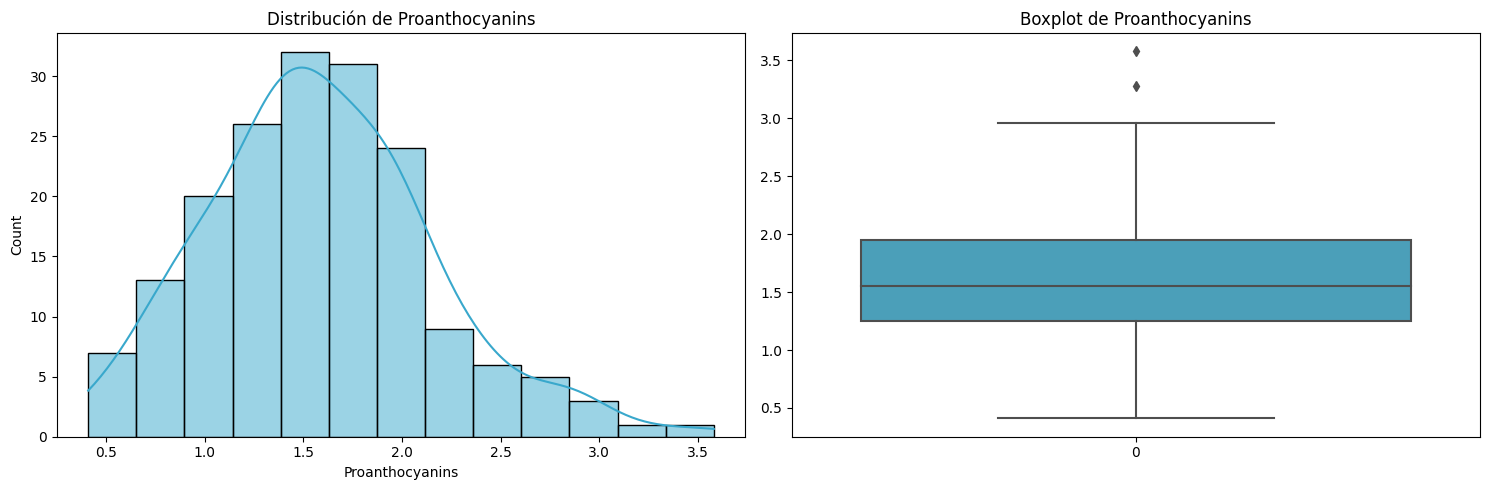

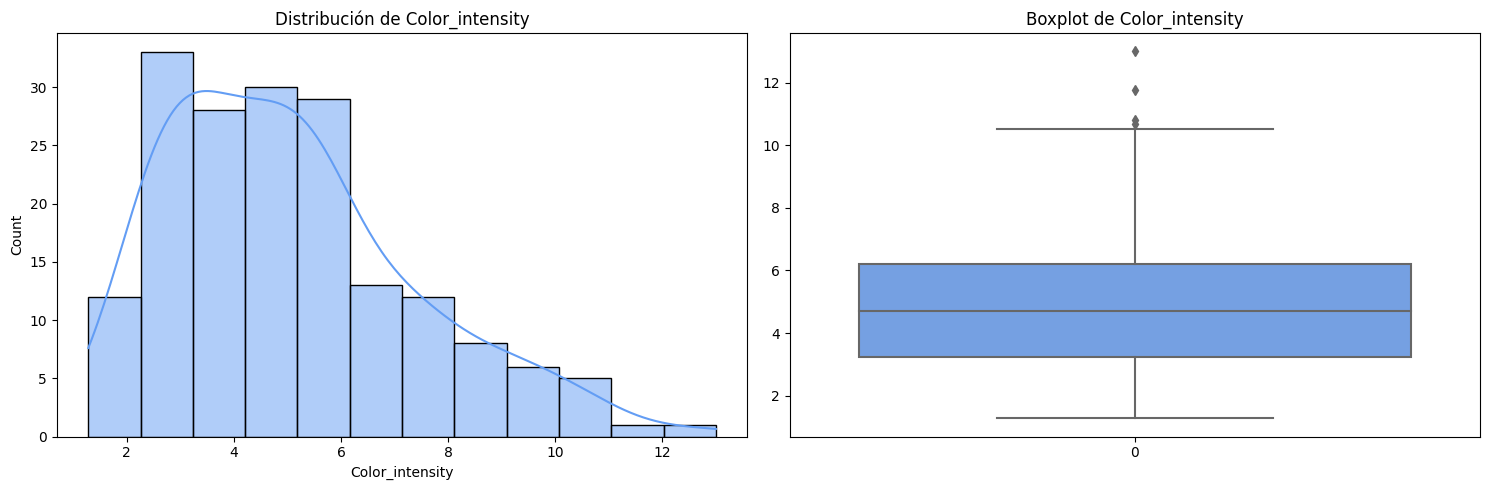

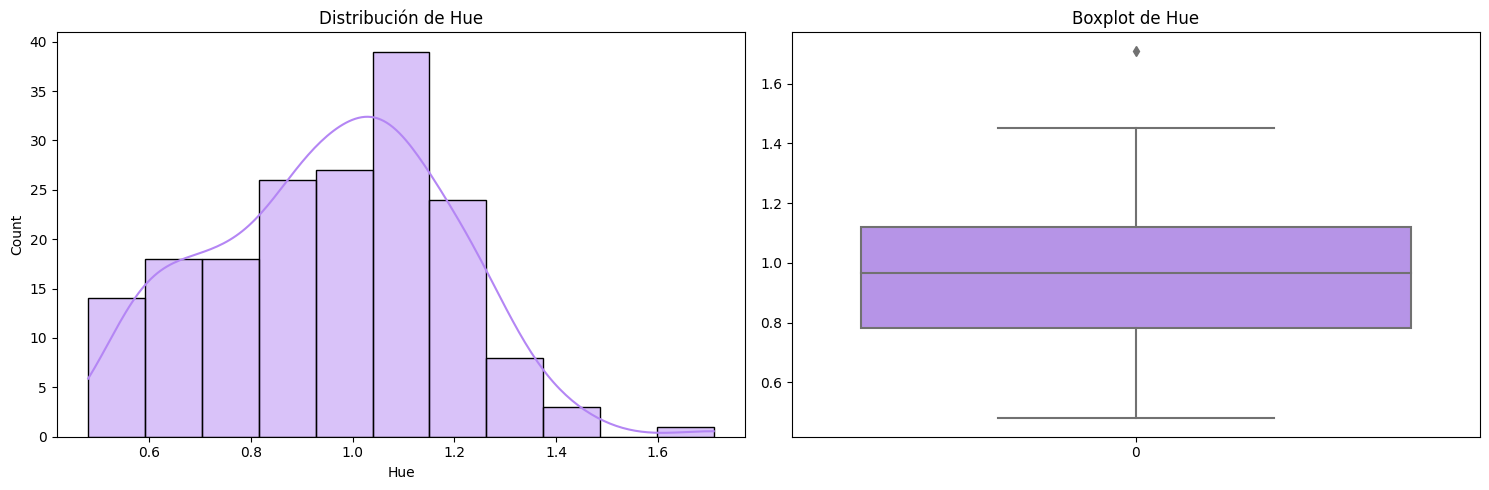

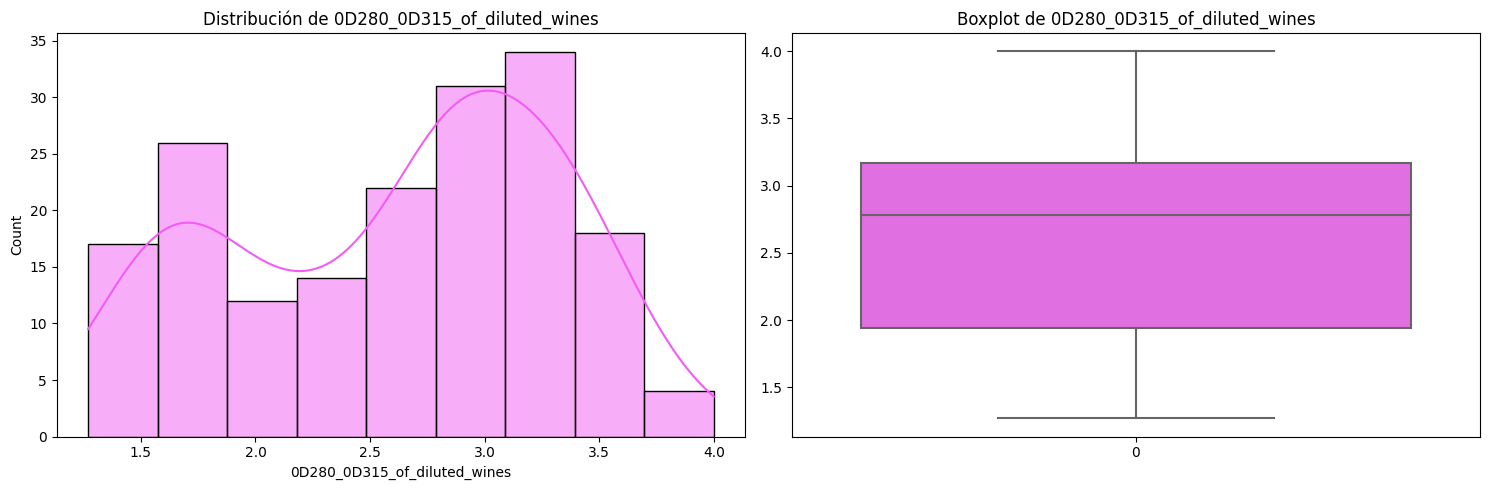

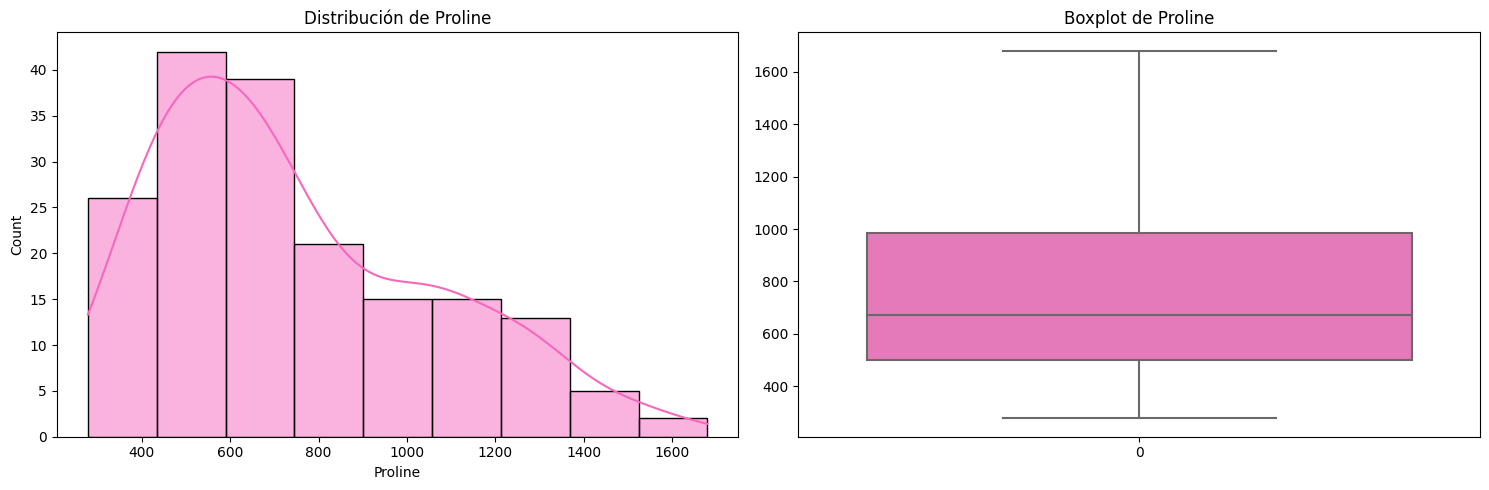

In [0]:
#Diagramas de caja para validar media, mediana, cuartiles y datos outliers

colores = sns.color_palette("husl", len(data_features.columns))

for i, variable in enumerate(data_features.columns):
    plt.figure(figsize=(15, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], kde=True, color=colores[i])
    plt.title(f'Distribución de {variable}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable], color=colores[i])
    plt.title(f'Boxplot de {variable}')
   
    plt.tight_layout()
    plt.show()

Ningun histograma indica una forma normal sobre las caracteristicas dadas, aunque si hay algunas caracteristicas tales como: Proanthocyanis, Alcalinity of ash y ash, que tienen una forma mas cercana a lo normal, dado eso, en la normalizacion no sera necesario implementar metodos muy robustos.

La mayoria presenta una curtosis de tipo mesocurtica y las variables previamente mencionadas se acercan a una distribucion mas leptocurtica, lo que indica una mayor probabilidad de obtener los valores que se encuentran en el centro y que a la par no hay una dispersion muy marcada entre los valores. Por otro lado, con aquellas variables que presentan una distribucion mesocurtica, es mas probable que haya dispersion entre los datos y por ende las probabilidades en las frecuencias de los valores sean mas volatiles.

Por otro lado varios de los diagramas indican una tendencia a los sesgos positivos, por lo cual se podria aplicar metodos de normalizacion orientados al logaritmo natural.

Ademas, algunos histogramas tienden una forma uniforme lo cual denota probabilidades muy similares entre las frecuencias de los valores, por lo cual puede tener implicaciones de redundancia.

Como es posible visualizar, algunas variables contienen datos outliers que pueden afectar el rendimiento del modelo, sin embargo, no quita que sigan siendo datos reales, debido a esto, como maxima prioridad sera aplicar metodos de normalizacion como el robust, por cuartiles o con Power transformer, esto con el objetivo de disminuir los valores outliers.

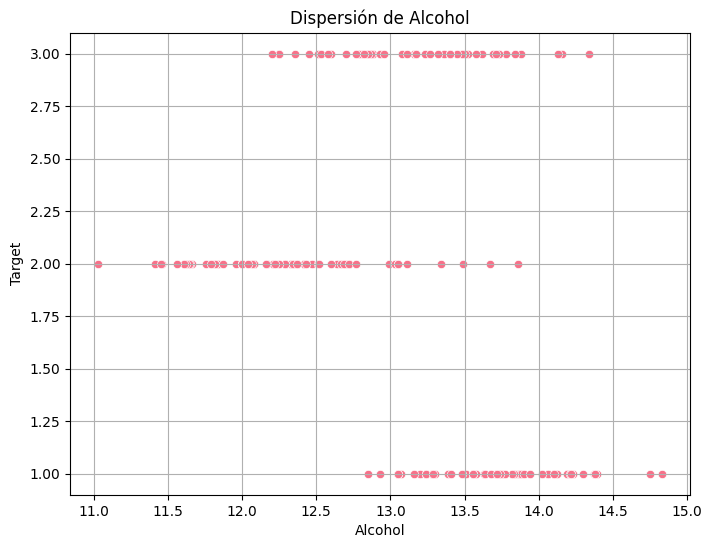

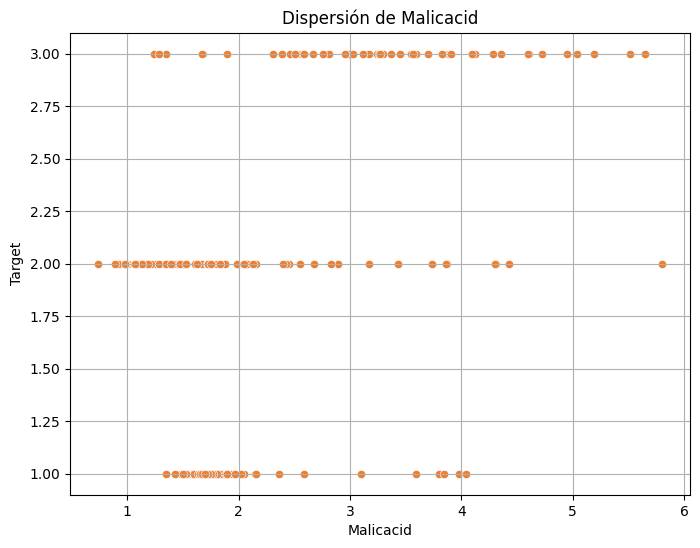

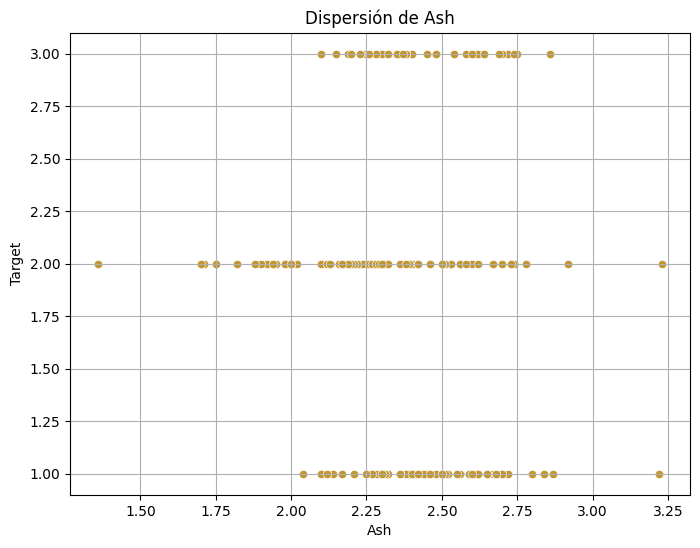

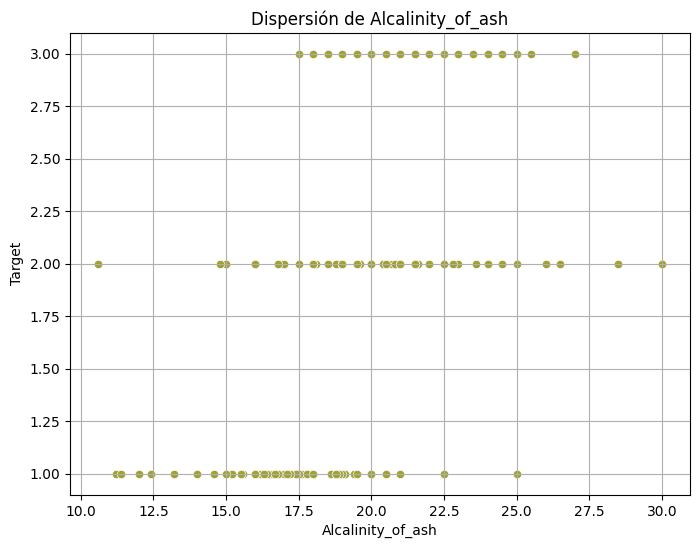

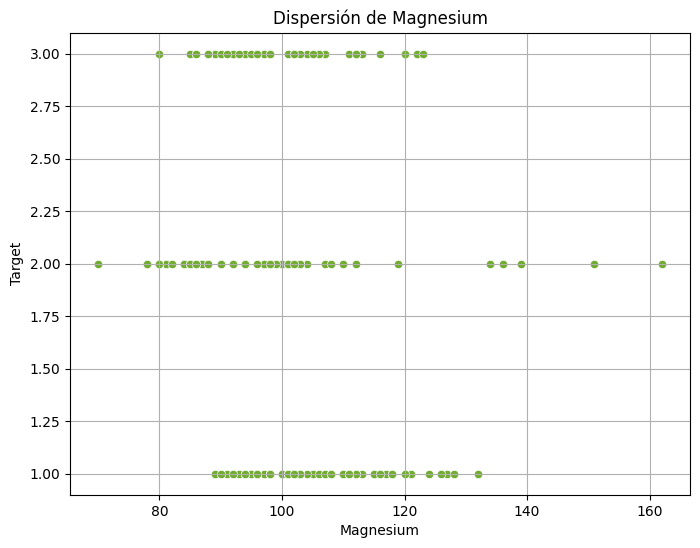

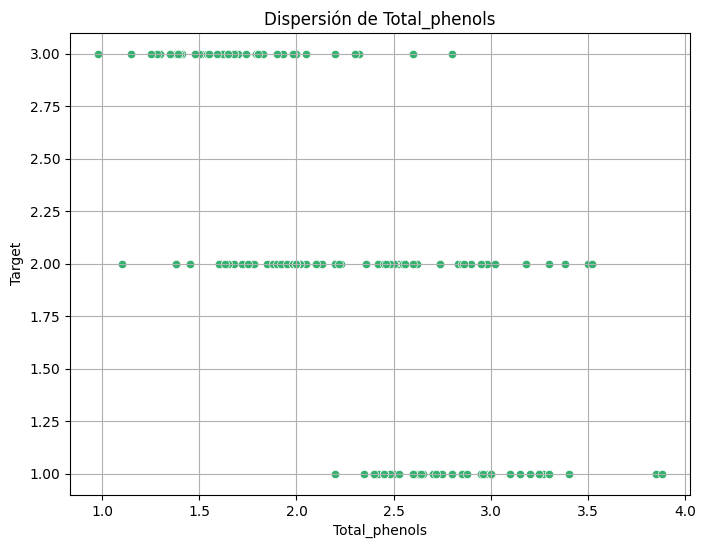

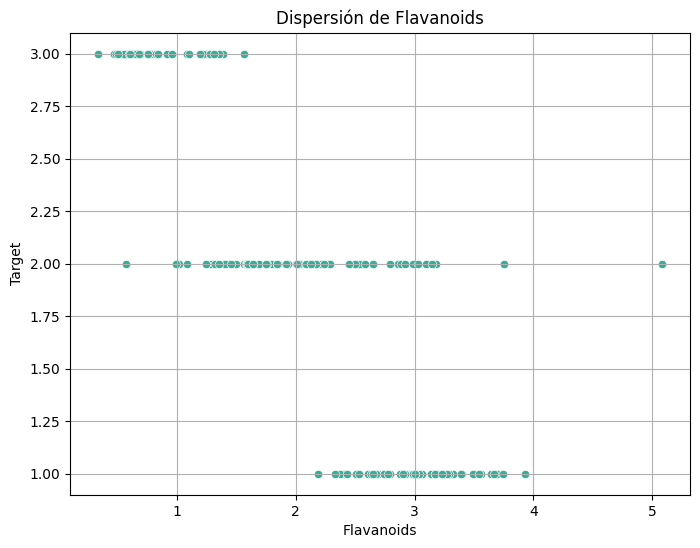

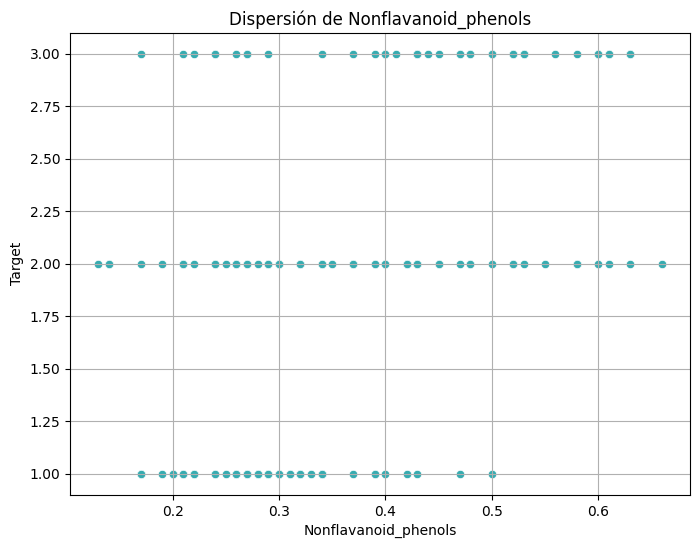

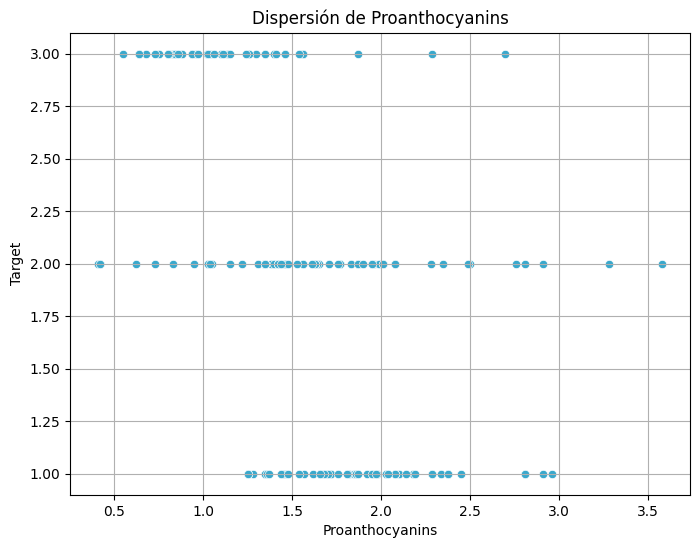

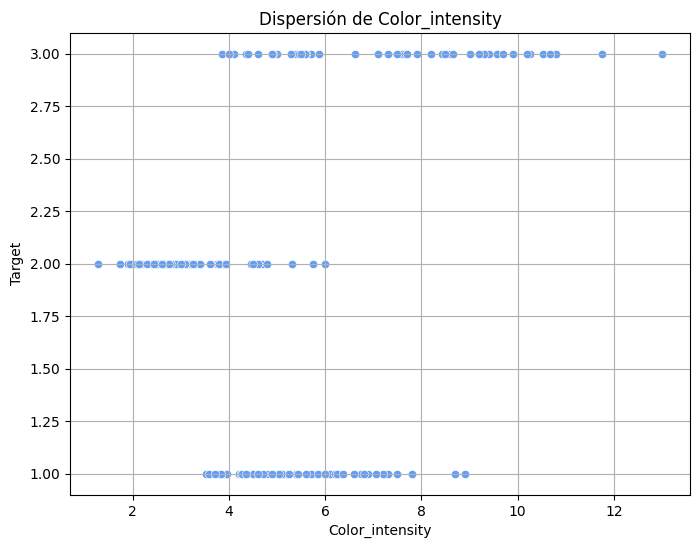

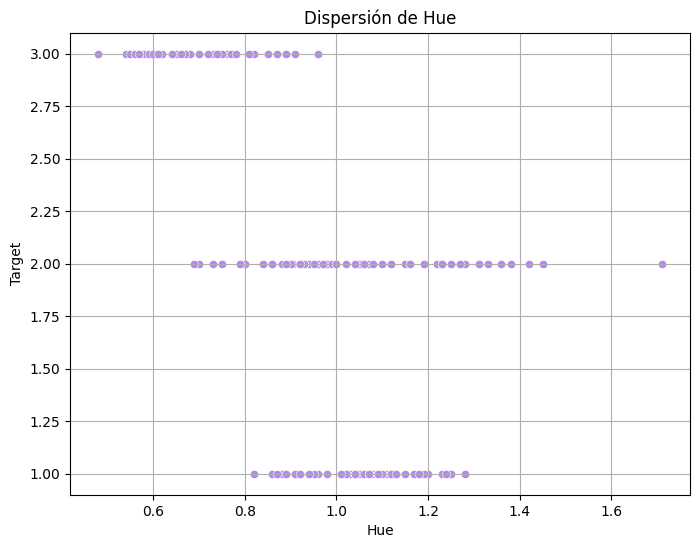

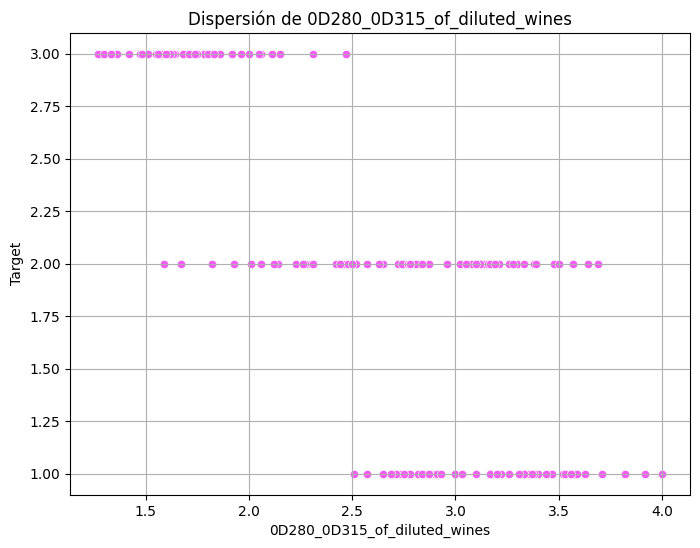

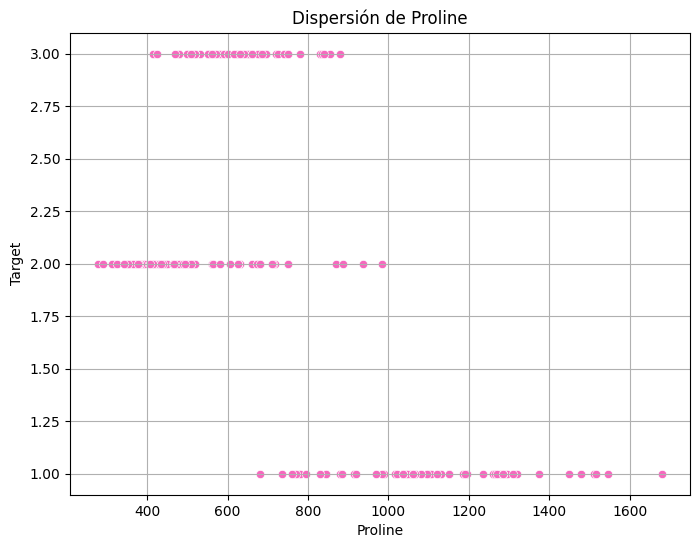

In [0]:
#Colores para los gráficos
colores = sns.color_palette("husl", len(data_features.columns))

#Gráficos de dispersión para cada variable
for i, variable in enumerate(data_features.columns):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=variable, y="Target", color=colores[i])
    plt.title(f'Dispersión de {variable}')
    plt.xlabel(variable)
    plt.ylabel("Target")
    plt.grid(True)
    plt.show()

Es posible visualizar que, no existe linealidad con ninguna caracteristica provista en funcion de la variable dependiente, ademas, por cada posible valor de la variable es visible que los datos poseen una dispersion significativa y que a la par, no existe un patron de agrupacion que permita facilitar el proceso. Debido a esto es fundamental estandarizar las escalas para asi tener un menor ruido provocado por los outliers.

Text(0.5, 1.0, 'Correlacion')

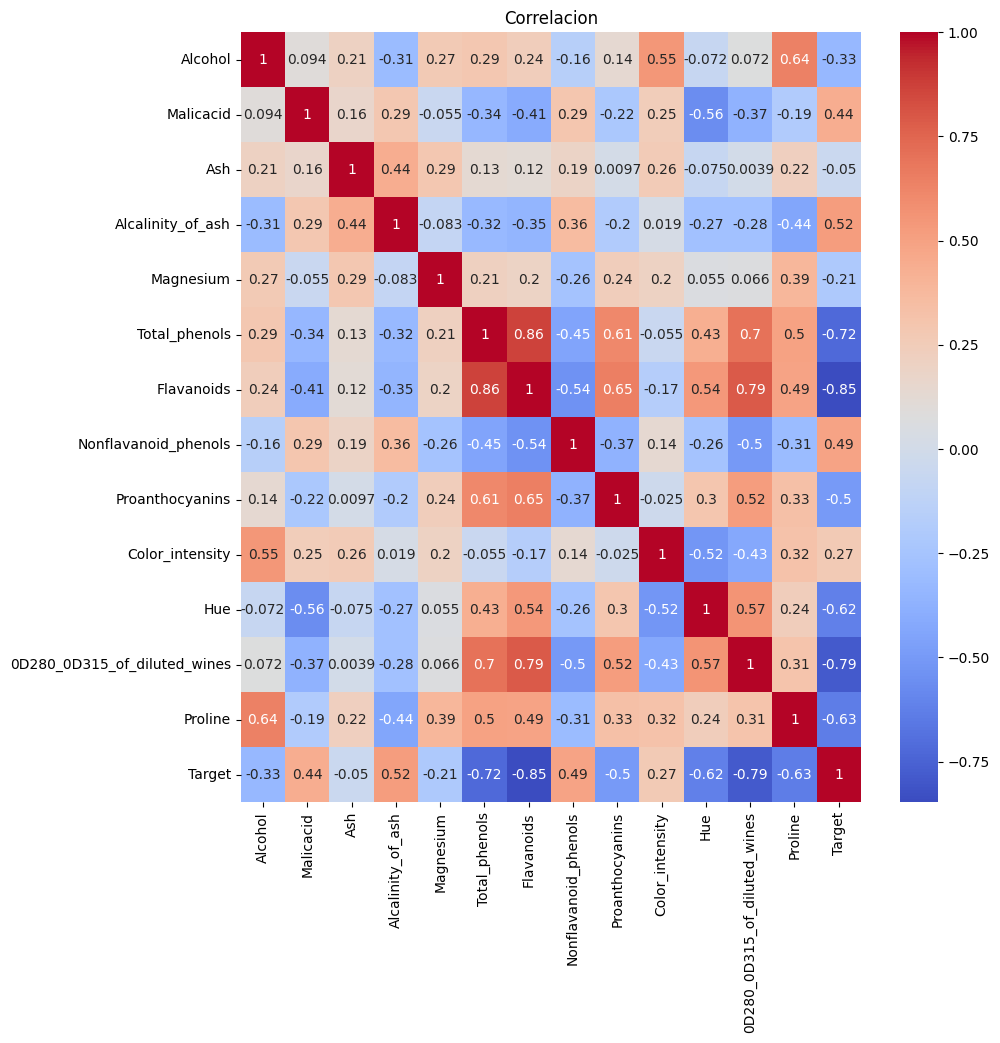

In [0]:
#Grafico de correlacion para calificar las variables independientes y a la par, determinar si existe redundancia entre las variables
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('Correlacion')

In [0]:
#Como consulta adicional se determina el balanceo de las clases:

df['Target'].value_counts()

2    71
1    59
3    48
Name: Target, dtype: int64

Es posible ver que existe un conjunto de caracteristicas que esta estrechamente relacionadas y que a la par, no aportan en gran medida a nivel de correlacion sobre la variable dependiente, esto en concreto para el caso de Flavanoid y Total_phenols. Dado esto, es viable eliminar una de las variable para asi no ser redundates con el analisis, ademas junto a otra caracteristica "0D280_0D315_of_diluted_wines" son las que menos informacion aportan a la variable objetivo a nivel de correlacion. De hecho, si se detalla, esas 3 variables estan estrechamante relacionadas, por lo cual se puede optar por un metodo de normalizacion de L2 para que asi AAAAAAAAAAAAAAAAAAAAAA

Respecto al resto de las otras variables, se tienen correlaciones muy varacionales, ademas de que aquellas caracteristicas que mas informacion le aportan a la variable dependiente no suelen tener una relacion muy fuerte con otras caracteristicas, a excepcion de "color_intensity".

Finalmente, se determina que existe una clase "2" la cual tiene una mayor presencia en los datos, aunque la diferencia entre las otras clases no es muy alta, es importante trazarlas especialmente con los modelos de validacion para que el modelo, entre la aleatoridad no termine afectando el resultado de las demas clases.

#Resumen del analisis

Alcohol: 
* Mesocurtica, cercana a una distribucion uniforme, no tiene datos outliers. 
* Tiene una buena correlacion con las variables: "Color_intensity" y "Proline"

Malicalid: 
* Mesocurtica, sesgo que tiende al positivo ,tiene datos outliers
* Tiene una buena correlacion con la variable dependiente.

Ash:
* Cercana a una leptocurtica, tiende a una forma normal, tiene datos outliers.
* Tiene una buena correlacion con la variable "alcanity of ash"

Alcalinity of ash:
* Cercana a una leptocurtica, tiende a una forma normal, tiene datos outliers
* Tiene una buena correlacion con la variable "ash", "Nonflovanoid_phenols" y la variable dependiente

Magnesium: 
* Mesocurtica, tiende a una forma normal, tiene datos outliers.
* Tiene una buena correlacion con la variable "Proline"

Total_phenols:
* Mesocurtica, tiende a una forma uniforme, no tiene datos outliers.
* Sera la variable que se mantendra frente a la correlacion con "Flavanoids" y tiene una buena correlacion con "0D28...", "Proanthocyanins","Hue" y "proline"

Nonflavanoid_phenols:
* Mesocurtica, tiende a una forma normal con sesgo positivo ,no tiene datos outliers .
* Tiene una buena correlacion con la variable dependiente y con "Alcalinity of ash"

Proanthocyanins:
* Tiende a una leptocurtica de forma normal, tiene datos outliers.
* Tiene una buena correlacion con las variables total

Color_intensity:
* Mesocurtica, tiende a un sesgo positivo ,tiene datos outliers.
* Tiene una buena correlacion con "Alcohol" y correlacion positiva con la variable dependiente

Hue:
* Mesocrutica, tiende a una forma un poco normal, tiene un dato outlier.
* Tiene una buena correlacion con "total_phenols", "flavanoids" y "0D28..."

0D28:
* No tiene un patron de densidad claro,no tiene datos outliers
* Tiene buena correlacion con "Total_phenols", "Proanthocyanins" y "Hue".

Proline:
* Mesocurtica, tiende a un sesgo positivo, no tiene datos outliers.
* Tiene una buena correlacion con "Alcohol", "Magnesium", "Total phenols" y "Flavanoids". En general es la variable con mejores correlaciones respecto a lo que caracteristicas refiere

##Variables a tomar en cuenta

Malicalid, Ash, Alcalinity of ash, Magnesium,proanthocyanins, Color intensity, Hue

In [0]:
#Como primer paso inicial, se dara mayor importancia a aquellas variables que tengan valores outlieres y que a la par, no tengan una distribucion normal, esto debido a que mediante la normalizacion es posible estandarizar las escalas y por ende mejorar la calidad de los datos.

df_test_normalization = df.copy()

robust_scaler = RobustScaler()
standard_scaler = StandardScaler()
power_scaler_bx = PowerTransformer(method='box-cox')

df_test_normalization['Malicacid'] = np.log(df_test_normalization['Malicacid'])
df_test_normalization['Malicacid'] = standard_scaler.fit_transform(df_test_normalization[['Malicacid']])

df_test_normalization['Ash'] = power_scaler_bx.fit_transform(df_test_normalization[['Ash']])
df_test_normalization['Ash'] = standard_scaler.fit_transform(df_test_normalization[['Ash']])

df_test_normalization['Alcalinity_of_ash'] = power_scaler_bx.fit_transform(df_test_normalization[['Alcalinity_of_ash']])
df_test_normalization['Alcalinity_of_ash'] = standard_scaler.fit_transform(df_test_normalization[['Alcalinity_of_ash']])

df_test_normalization['Magnesium'] = np.log(df_test_normalization['Magnesium'])
df_test_normalization['Magnesium'] = standard_scaler.fit_transform(df_test_normalization[['Magnesium']])

df_test_normalization['Proanthocyanins'] = power_scaler_bx.fit_transform(df_test_normalization[['Proanthocyanins']])
df_test_normalization['Proanthocyanins'] = standard_scaler.fit_transform(df_test_normalization[['Proanthocyanins']])

df_test_normalization['Color_intensity'] = np.log(df_test_normalization['Color_intensity'])
df_test_normalization['Color_intensity'] = standard_scaler.fit_transform(df_test_normalization[['Color_intensity']])

df_test_normalization['Hue'] = power_scaler_bx.fit_transform(df_test_normalization[['Hue']])
df_test_normalization['Hue'] = standard_scaler.fit_transform(df_test_normalization[['Hue']])

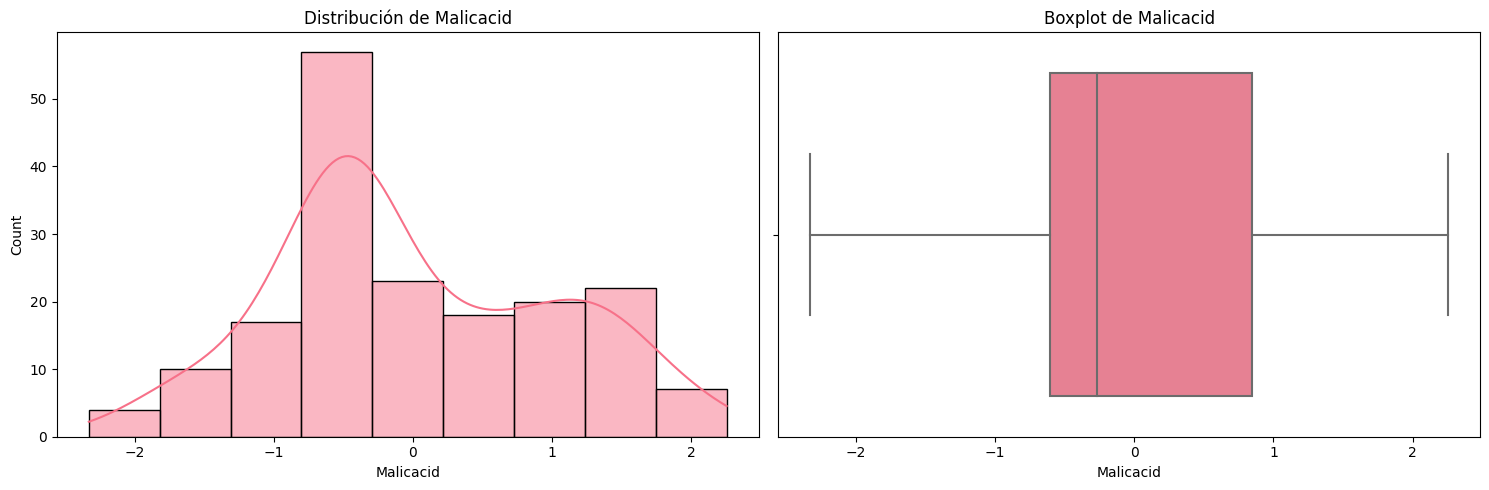

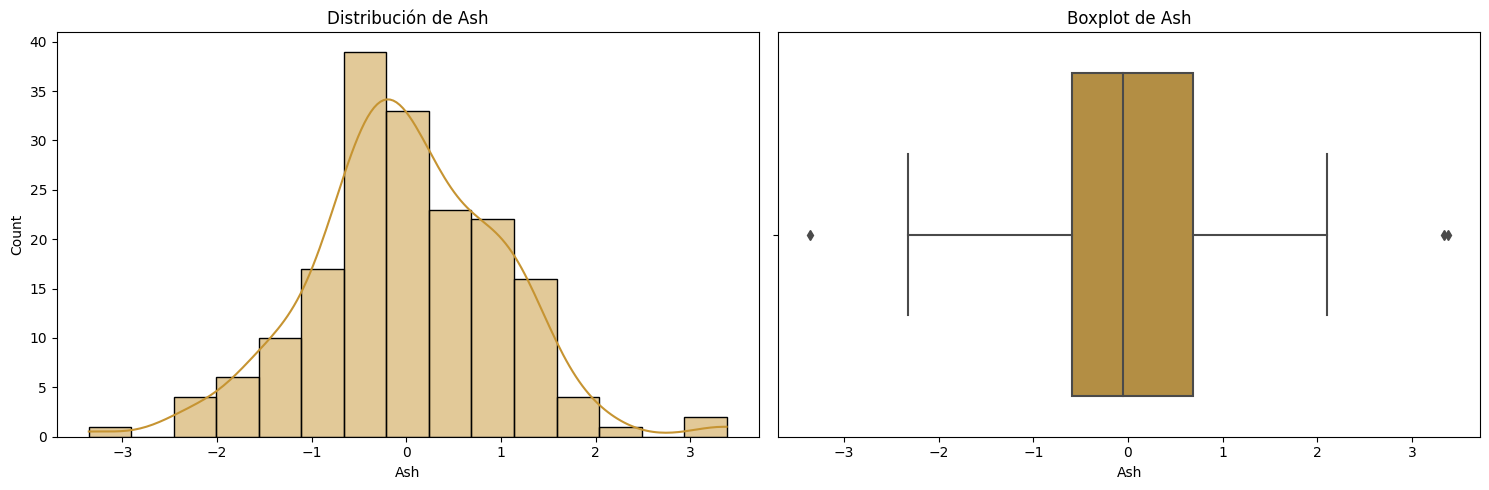

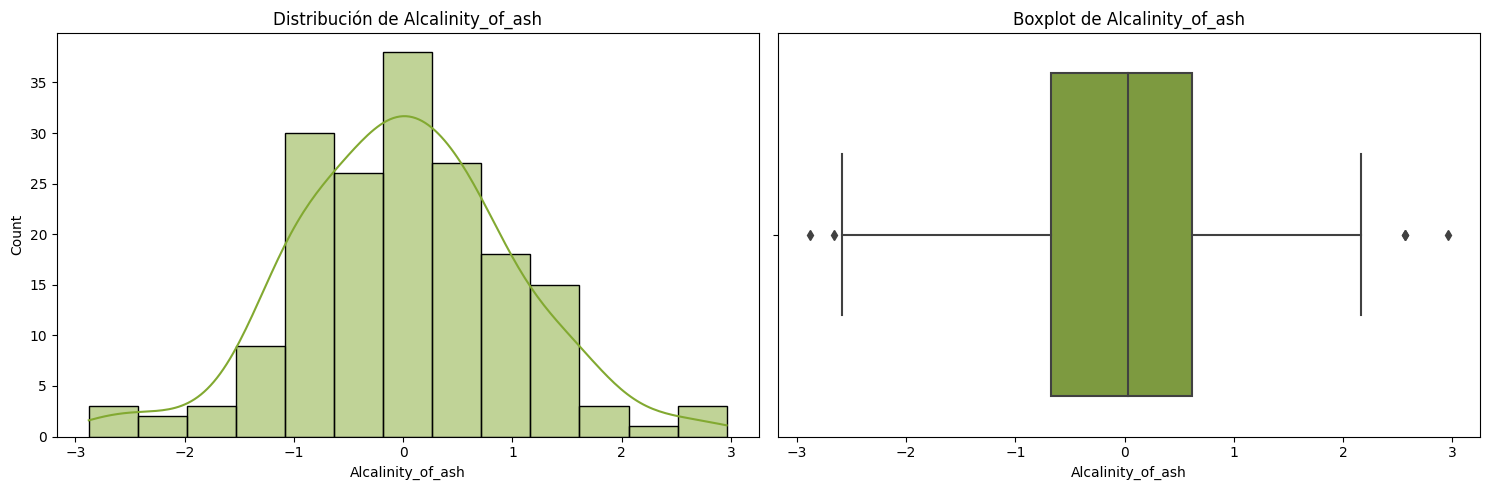

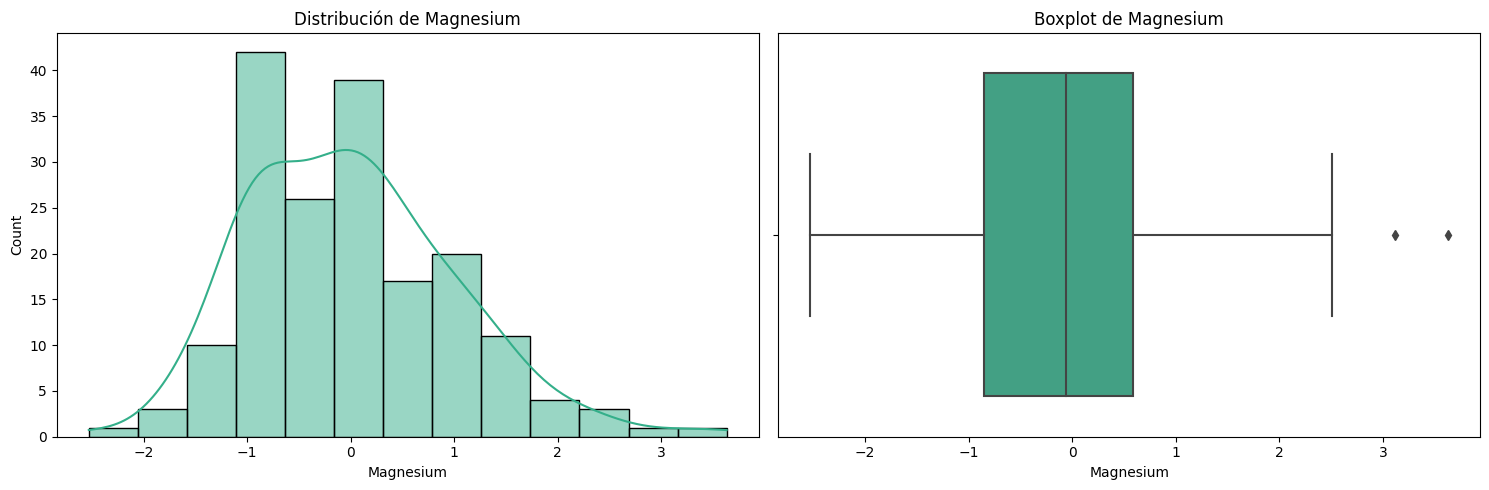

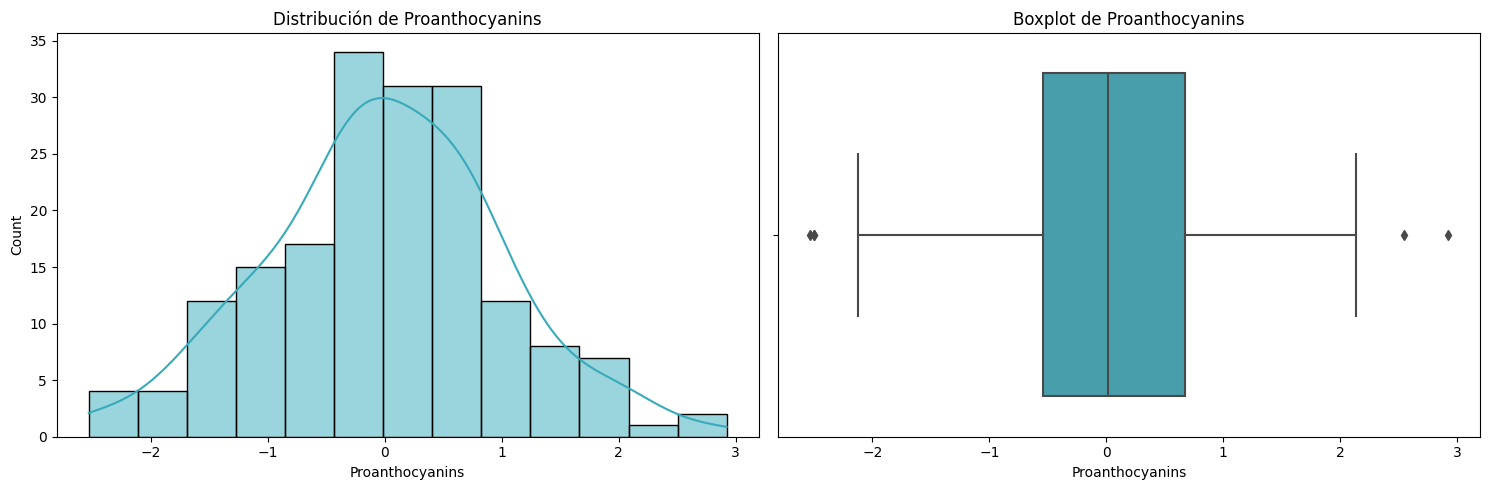

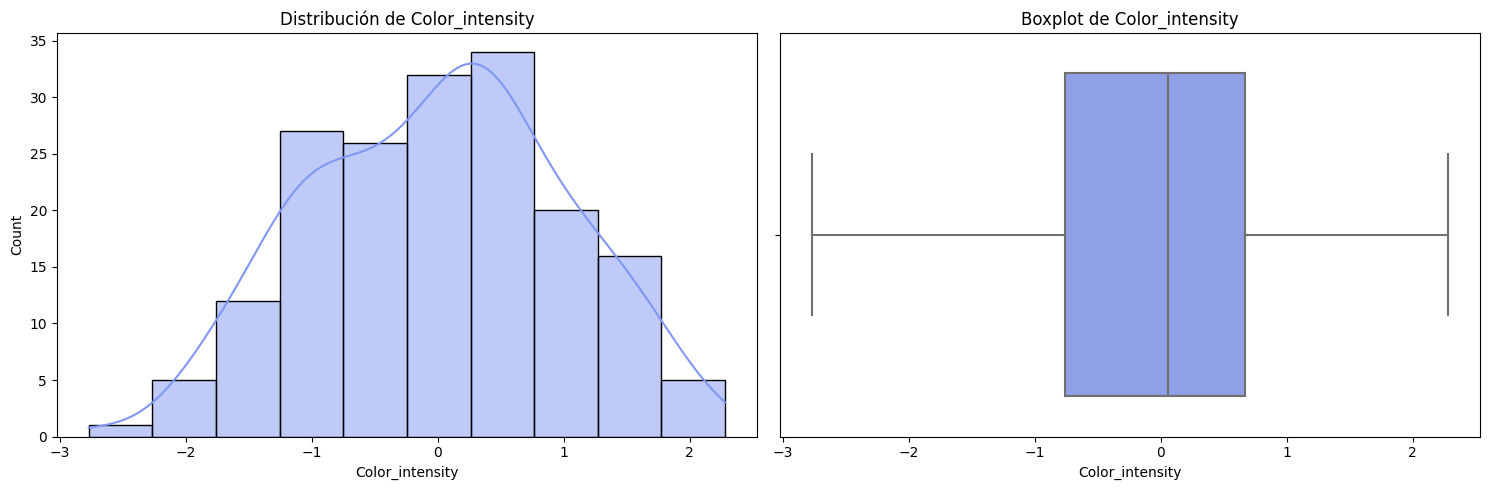

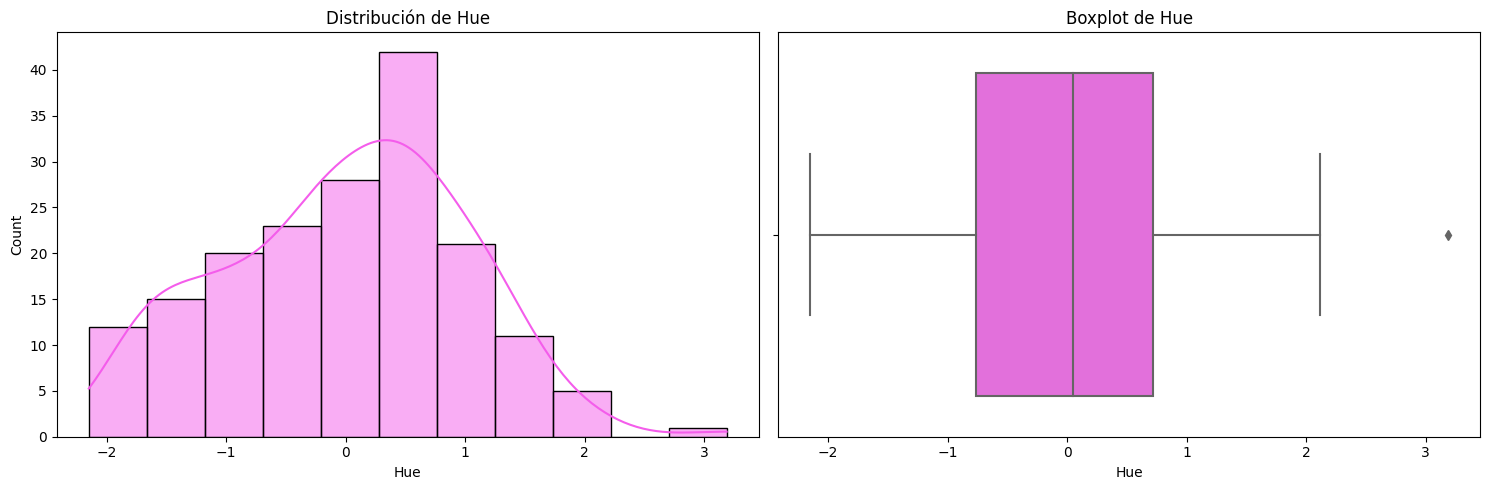

In [0]:
features = ["Malicacid", "Ash", "Alcalinity_of_ash", "Magnesium", "Proanthocyanins", "Color_intensity", "Hue"]

colores = sns.color_palette("husl", len(features))

for i, variable in enumerate(features):
    plt.figure(figsize=(15, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df_test_normalization[variable], kde=True, color=colores[i])
    plt.title(f'Distribución de {variable}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_test_normalization[variable], color=colores[i])
    plt.title(f'Boxplot de {variable}')

    plt.tight_layout()
    plt.show()

In [0]:
#df_test_normalization = df.copy()

df_test_normalization['Nonflavanoid_phenols'] = power_scaler_bx.fit_transform(df_test_normalization[['Nonflavanoid_phenols']])
df_test_normalization['Nonflavanoid_phenols'] = standard_scaler.fit_transform(df_test_normalization[['Nonflavanoid_phenols']])

df_test_normalization[["Total_phenols","0D280_0D315_of_diluted_wines"]] = normalize(df_test_normalization[["Total_phenols","0D280_0D315_of_diluted_wines"]], norm='l2')

df_test_normalization['Alcohol'] = power_scaler_bx.fit_transform(df_test_normalization[['Alcohol']])
df_test_normalization['Alcohol'] = standard_scaler.fit_transform(df_test_normalization[['Alcohol']])

df_test_normalization['Proline'] = power_scaler_bx.fit_transform(df_test_normalization[['Proline']])
df_test_normalization['Proline'] = standard_scaler.fit_transform(df_test_normalization[['Proline']])

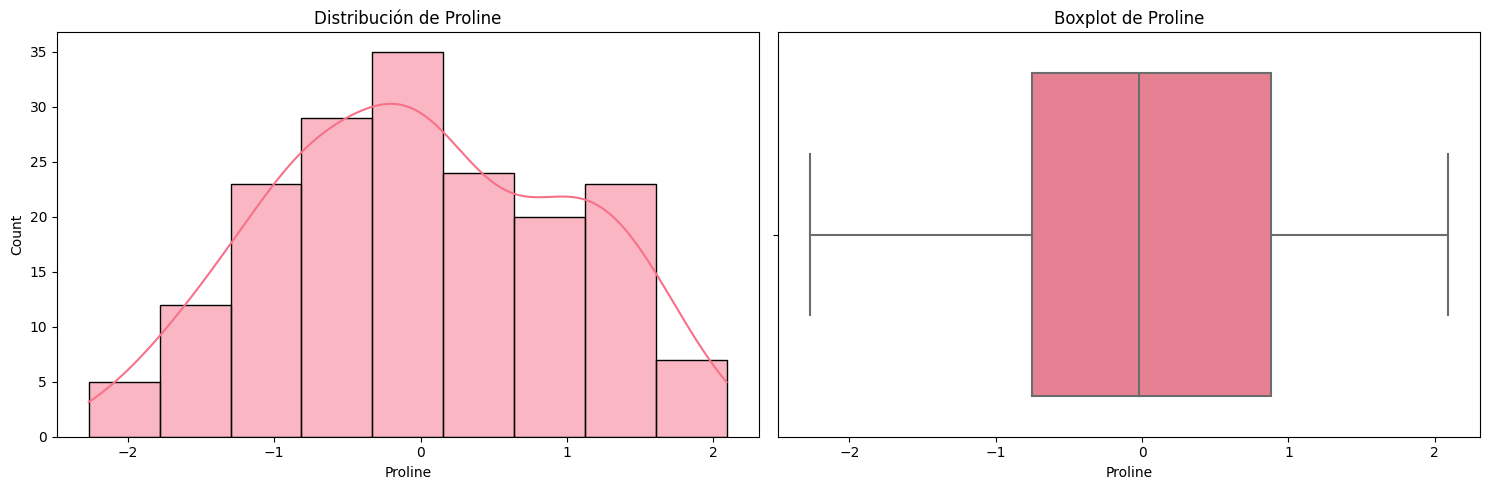

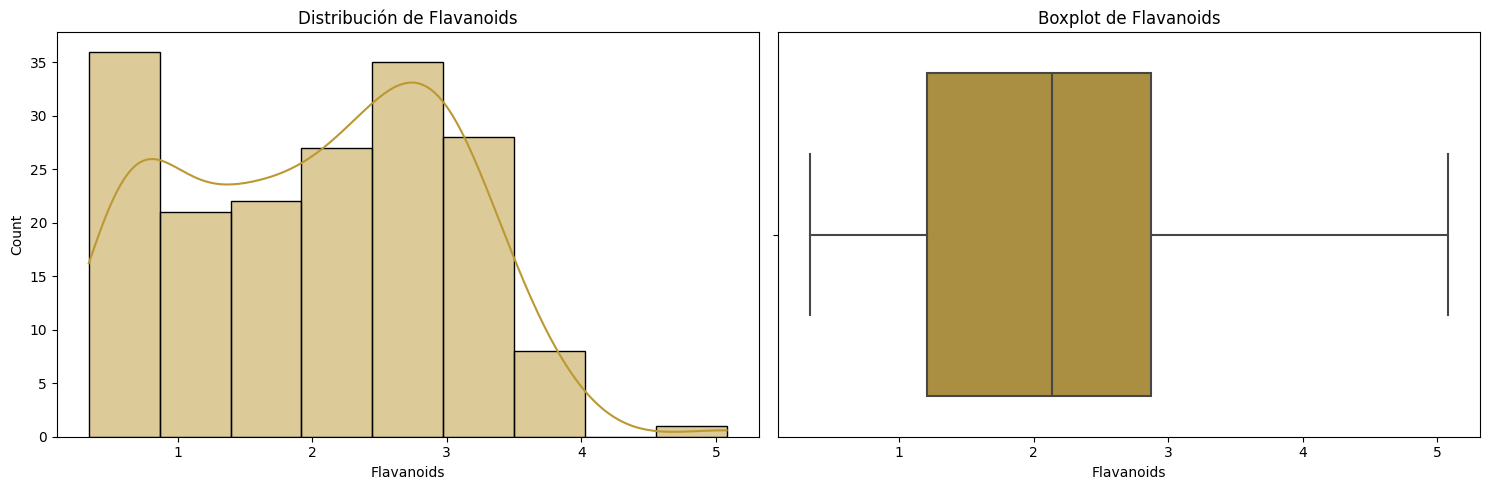

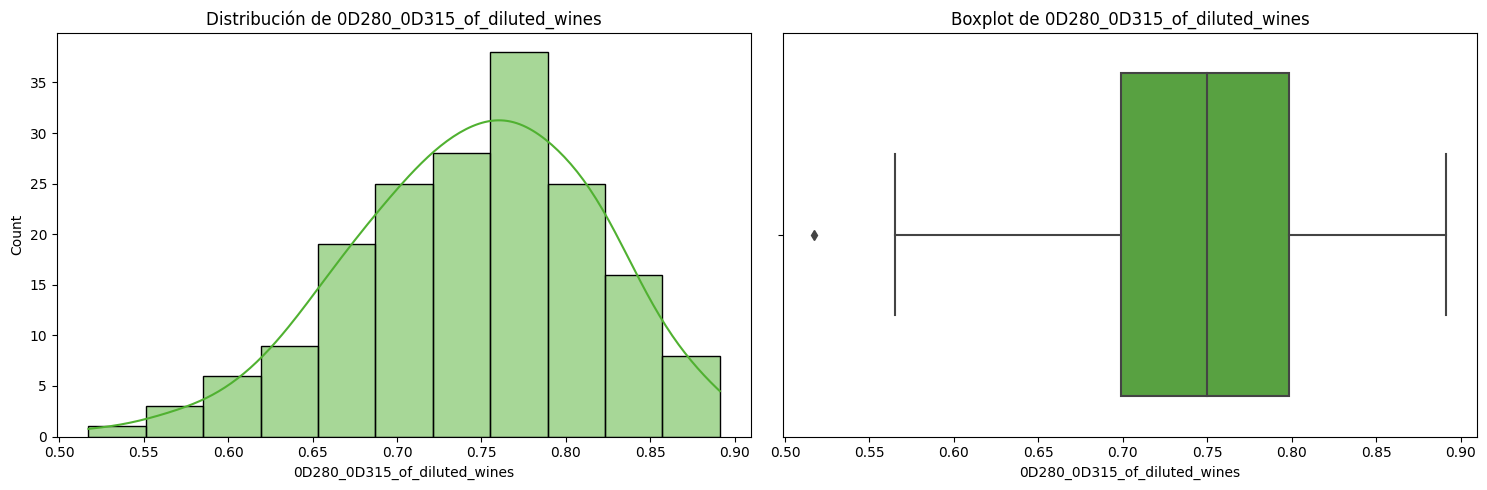

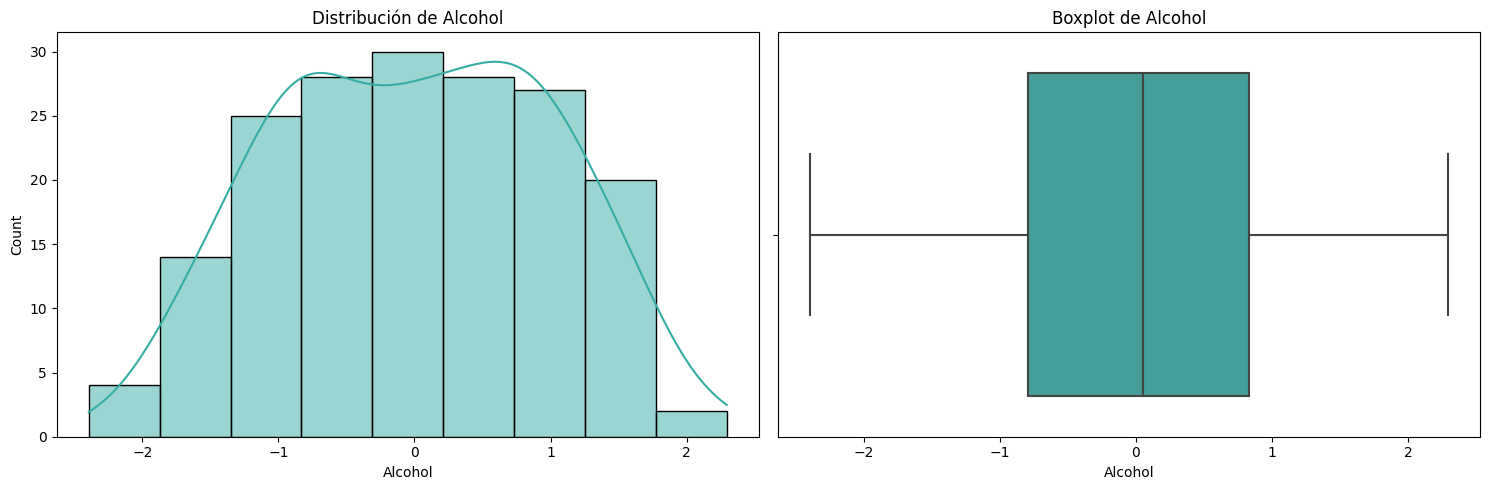

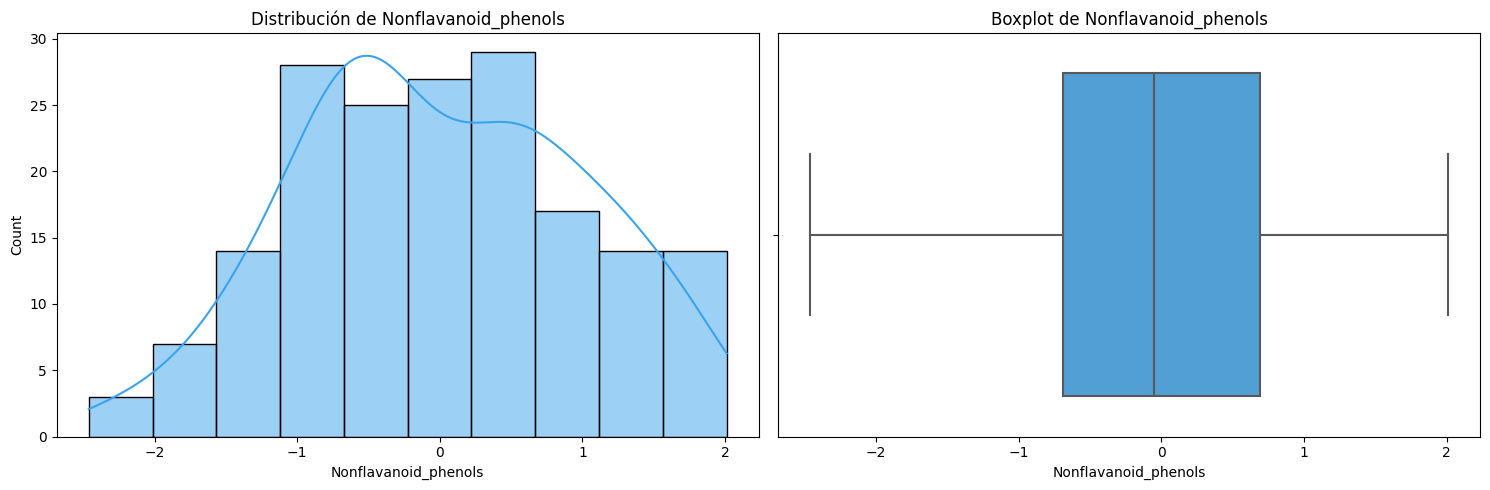

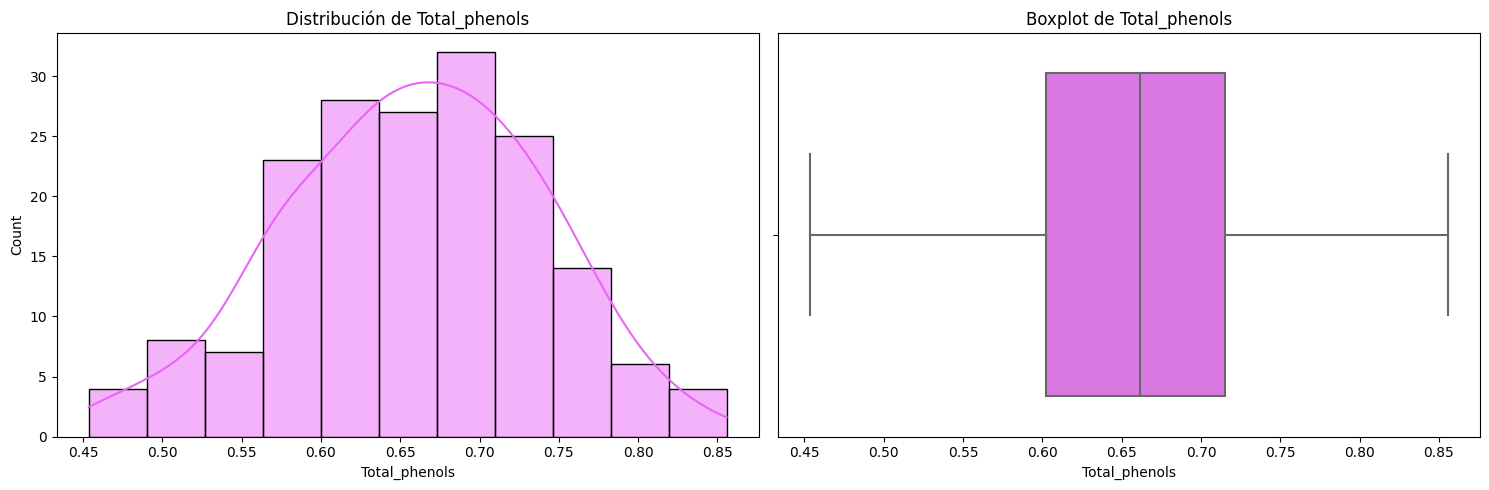

In [0]:
#Se evaluan las variables restantes
left_features = resultado = list(set(data_features.columns) ^ set(features))

colores = sns.color_palette("husl", len(left_features))

for i, variable in enumerate(left_features):
    plt.figure(figsize=(15, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df_test_normalization[variable], kde=True, color=colores[i])
    plt.title(f'Distribución de {variable}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_test_normalization[variable], color=colores[i])
    plt.title(f'Boxplot de {variable}')

    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Correlacion')

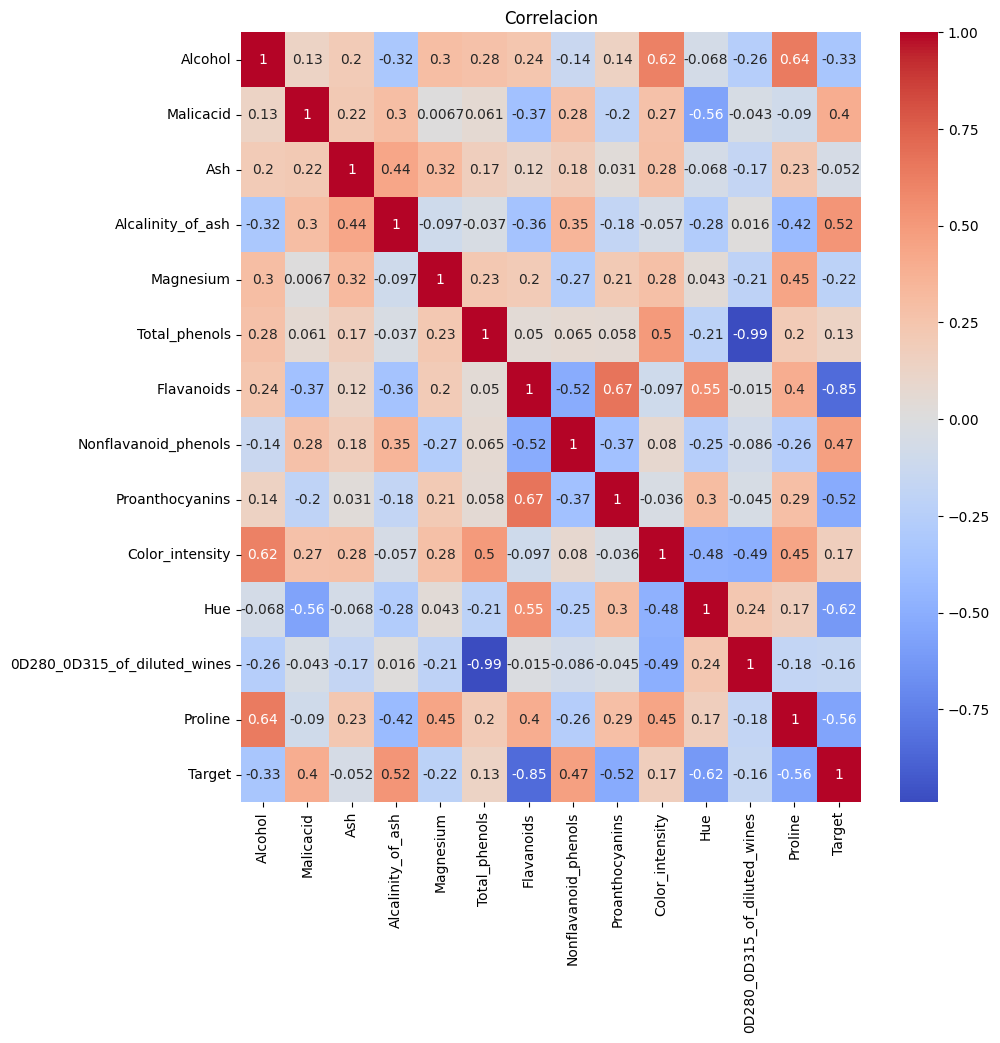

In [0]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_test_normalization.corr(),cmap='coolwarm',annot=True)
plt.title('Correlacion')

Con base a las normalizaciones previamente hechas, se determina cuales metodos pueden orientar los datos a una forma mas normal y asi, garantizar una probabilidad mas estandarizada en funcion de los distintos valores provistos.

Ademas, es posible ver que los valores referente a las correlaciones entre las caracteristicas y a la par con la variable dependiente mejoraron.

In [0]:
#Una vez que se validaron los respectivos metodos de normalizacion, lo siguiente es definir los pipelines de transformacion sobre el df para llevar a cabo el proceso de validacion de modelos

log_transformer = FunctionTransformer(np.log1p, validate=True)

pipeline_numeric_pwt_bx = Pipeline([("power-transf", PowerTransformer(method = "box-cox")),('scaler', StandardScaler())]) 
pipeline_numeric_log = Pipeline([("log", log_transformer),('scaler', StandardScaler())])
pipeline_numeric_l2 = Pipeline([("L2", Normalizer(norm='l2')),('scaler', StandardScaler())]) 

In [0]:
column_transf= ColumnTransformer([("Eliminar","drop",[6,13]),
                                   ("Pipeline_num_bx",pipeline_numeric_pwt_bx,[2,3,7,8,10,12]),
                                    ("Pipeline_num_log",pipeline_numeric_log,[1,4,9]),
                                    ("Pipeline_num_L2",pipeline_numeric_l2,[5,11])])

In [0]:
X_val = column_transf.fit_transform(df)
y_val  = df['Target'].values

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

In [0]:
#Creacion de arreglos para poder realizar una validacion de resultados con distintos modelos
resultados_regression, resultados_tree, resultados_svc, resultados_treeRandom, resultados_xgb = [],[],[],[],[]

#El siguiente metodo permite balancear las clases y a la par, definir de forma mas granular caracteristicas referente a la proporcion del fold para el test, ademas de
#una semilla para asi no tener resultados diferentes muy marcados en cada ejecucion.
stratified_shuffle_split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

#Debido a que el problema es multibinario se debe indicar sobre la metrica elegida, ademas se indica que pondere los resultados por cada clase debido al desbalanceo de clases
f1_weighted = make_scorer(f1_score, average='weighted')

El proceso de validacion se llevara a cabo con todo el conjunto de datos, esto debido a que, los folds generados en funcion del valor numerico que se indique se encargara de segmentar los distintos conjuntos de entrenamiento y test.

Por otro lado, no se indica una parte especifica de datos para test debido a la poca cantidad registros y que a la par, de hacer alguna division, probablemente alguna clase saldra beneficiada, esto puede derivar en problemas de sobreajuste o subajuste para algunas clases.

In [0]:
result_regression = cross_validate(LogisticRegression(),X_val,y_val,scoring=f1_weighted,cv=stratified_shuffle_split)
resultados_regression.append((result_regression["test_score"].mean()*100,result_regression["test_score"].std()*100))

In [0]:
print(result_regression["test_score"])
print(" ")
print(resultados_regression)

[0.88725146 0.94320988 0.94352462 0.97236919 0.97197016]
 
[(94.36650623841591, 3.1009117098290746)]


In [0]:
result_tree = cross_validate(DecisionTreeClassifier(),X_val,y_val,scoring=f1_weighted,cv=stratified_shuffle_split)
resultados_tree.append((result_tree["test_score"].mean()*100,result_tree["test_score"].std()*100))

In [0]:
print(result_tree["test_score"])
print(" ")
print(resultados_tree)

[0.9453358  0.97197016 0.89179232 0.88730159 0.88725146]
 
[(91.67302646057306, 3.528929042373199)]


In [0]:
result_svc = cross_validate(SVC(),X_val,y_val,scoring=f1_weighted,cv=stratified_shuffle_split)
resultados_svc.append((result_svc["test_score"].mean()*100,result_svc["test_score"].std()*100))

In [0]:
print(result_svc["test_score"])
print(" ")
print(resultados_svc)

[0.91557258 0.91700864 1.         0.97209728 0.91652921]
 
[(94.4241544757589, 3.526034941975657)]


In [0]:
result_treeRandom = cross_validate(RandomForestClassifier(),X_val,y_val,scoring=f1_weighted,cv=stratified_shuffle_split)
resultados_treeRandom.append((result_treeRandom["test_score"].mean()*100,result_treeRandom["test_score"].std()*100))

In [0]:
print(result_treeRandom["test_score"])
print(" ")
print(resultados_treeRandom)

[1.         0.97209728 0.97209728 0.91623957 0.97226337]
 
[(96.65395030559117, 2.7365045429083272)]


In [0]:
y_val_adjusted = y_val - 1

result_xgb = cross_validate(xgb.XGBClassifier(), X_val, y_val_adjusted, scoring='f1_weighted', cv=stratified_shuffle_split)
resultados_xgb.append((result_xgb["test_score"].mean()*100,result_xgb["test_score"].std()*100))

In [0]:
print(result_xgb["test_score"])
print(" ")
print(resultados_xgb)

[1.         0.97209728 0.97209728 0.89005    1.        ]
 
[(96.68489147239245, 4.037611258272598)]


Con base a la validacion en modelos es posible ver que en general, varios modelos ofrecen muy buenos resultados, teniendo resultados promedios encima siempre del 0.9 sobre la metrica definida, lo cual, tambien indica que la precision y el recall estan generando buenos resultados aunque siempre con la probabilidad de que alguna metrica tenga un menor valor, ademas que es importante destacar que la metrica de la precision suele sesgarse a clases desbalanceadas, entonces lo mas probable es que esa metrica tenga un mayor valor respecto al recall.

Independiente de eso, los resultados siguen siendo positivos, algunos modelos son mucho mas complejos como los arboles aleatorios que usan tecnicas de hipotesis tras hipotesis, sin embargo, precisamente con este modelo, poder tener una trazabilidad sobre las hipotesis/ramas que se estan generando es sumamente complejo. Debido a esto, se opta seguir el proceso con modelos mas convencionales como lo son SVM, regresion logistica y XGBoost, aunque este ultimo claramente no es un modelo convencional, sin embargo su capacidad de optimizar las ramas de forma secuencia, agregando o quitando ramas ofrece generalmente mejores resultados y a la par que no genere una cantidad muy extensa de ramas para llevar a cabo las predicciones.

In [0]:
X,y = df[data_features.columns].values ,df["Target"].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=42)

In [0]:
print("Proporciones en y original:", np.bincount(y.astype(int)))
print("Proporciones en y_train:", np.bincount(y_train.astype(int)))
print("Proporciones en y_test:", np.bincount(y_test.astype(int)))

Proporciones en y original: [ 0 59 71 48]
Proporciones en y_train: [ 0 47 57 38]
Proporciones en y_test: [ 0 12 14 10]


In [0]:
column_transf_model = ColumnTransformer([("Eliminar","drop",[6]),
                                   ("Pipeline_num_bx",pipeline_numeric_pwt_bx,[2,3,7,8,10,12]),
                                    ("Pipeline_num_log",pipeline_numeric_log,[1,4,9]),
                                    ("Pipeline_num_L2",pipeline_numeric_l2,[5,11])])

In [0]:
#Creacion del pipeline que tiene como objetivo realizar los procesos de preprocesamiento del ColumnTransformer y la ejecucion del respectivo modelo elegido
pipeline_model = Pipeline([('Preprocess',column_transf_model),
                           ('Model',SVC(probability=True))])

In [0]:
#Ejecucion del modelo con sus variables de entrenamiento
model = pipeline_model.fit(X_train,y_train)

#Predicciones del modelo con base a sus variables de test
predictions = model.predict(X_test)

2024/08/23 01:28:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e999b12b7cdd4bf398f28131a4679153', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Uploading artifacts:   0%|          | 0/1 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/10 [00:00<?, ?it/s]

In [0]:
#Valores predecidos y valores reales
print('Predicted labels: ', predictions[:37])
print('Actual labels:    ' ,y_test[:37])

Predicted labels:  [1 2 1 1 2 1 1 2 2 3 2 3 1 2 1 2 2 1 2 1 2 2 1 1 2 2 1 3 2 3 1 3 2 3 3 3]
Actual labels:     [1 3 1 2 2 1 1 2 2 3 2 3 1 3 1 2 2 1 2 1 2 2 1 1 2 2 1 3 2 3 1 3 2 3 3 3]


In [0]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

In [0]:
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

Accuracy:  0.9166666666666666
Precision:  0.9225071225071224
Recall:  0.9166666666666666
F1:  0.9155725840783313


Resultados de modelos:

###SVM:

* Accuracy:  0.9166666666666666
* Precision:  0.9225071225071224
* Recall:  0.9166666666666666
* F1:  0.9155725840783313

###Regresion logistica:

* Accuracy:  0.8888888888888888
* Precision:  0.8879392212725546
* Recall:  0.8888888888888888
* F1:  0.8872514619883042

###XGB

* Accuracy:  1.0
* Precision:  1.0
* Recall:  1.0
* F1:  1.0

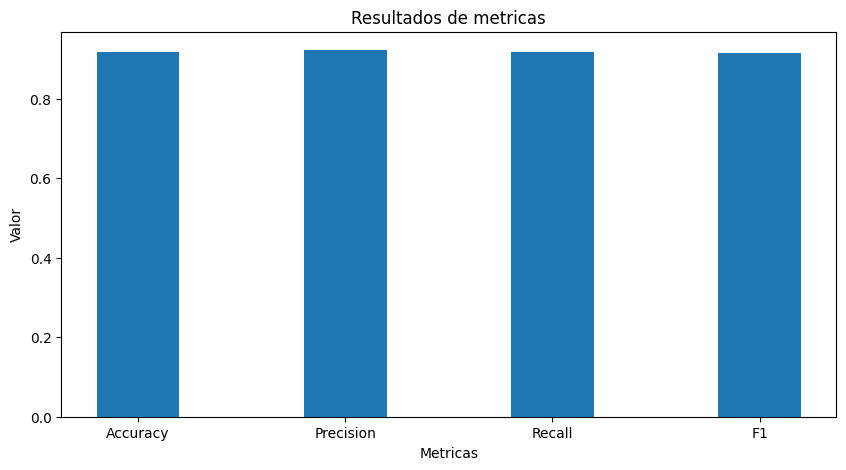

In [0]:
fig = plt.figure(figsize = (10, 5))

plt.bar(['Accuracy','Precision','Recall','F1'], [accuracy,precision,recall,f1], width = 0.4)

plt.xlabel("Metricas")
plt.ylabel("Valor")
plt.title("Resultados de metricas")
plt.show()

In [0]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.87      0.93      0.90        14
           3       1.00      0.80      0.89        10

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



<Axes: >

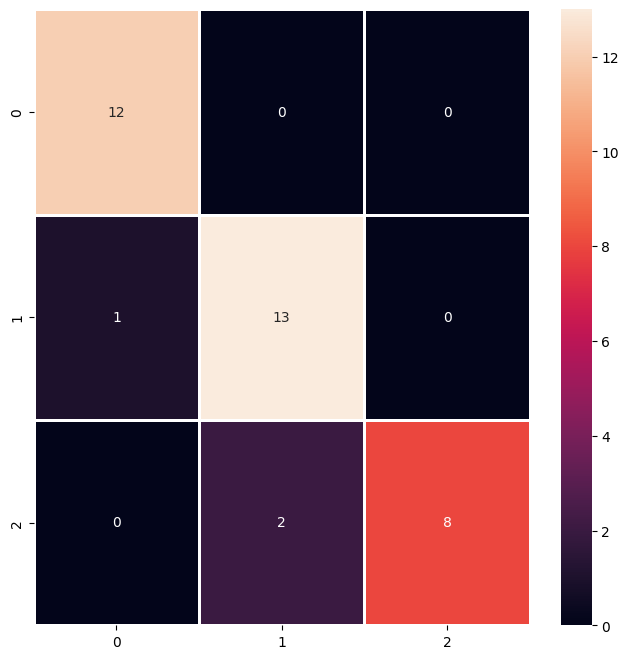

In [0]:
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.8, ax=ax)

In [0]:
#Probabilidad estadistica que tenia el modelo para elegir su respectivo target(1, 2 o 3) dado sus variables independientes
y_scores = model.predict_proba(X_test)
print(y_scores)

[[9.96700584e-01 2.23653855e-03 1.06287768e-03]
 [3.26579003e-02 8.16732217e-01 1.50609883e-01]
 [9.92359187e-01 6.22817904e-03 1.41263444e-03]
 [3.84475898e-01 5.12218062e-01 1.03306041e-01]
 [2.79947837e-02 9.65171979e-01 6.83323717e-03]
 [9.90826014e-01 5.97056371e-03 3.20342231e-03]
 [9.83961950e-01 5.49417753e-03 1.05438727e-02]
 [8.13190155e-02 9.06888909e-01 1.17920751e-02]
 [2.21570174e-02 8.86055628e-01 9.17873550e-02]
 [2.32963350e-02 9.61002139e-03 9.67093644e-01]
 [5.83928074e-03 9.85411620e-01 8.74909887e-03]
 [3.96386919e-02 8.27895916e-02 8.77571716e-01]
 [9.87527240e-01 7.47840930e-03 4.99435062e-03]
 [5.62916353e-02 7.42685382e-01 2.01022982e-01]
 [9.84963819e-01 9.39321630e-03 5.64296501e-03]
 [2.42917727e-06 9.99564277e-01 4.33293770e-04]
 [5.21676014e-03 9.76957298e-01 1.78259421e-02]
 [9.19687577e-01 7.57684126e-02 4.54400994e-03]
 [1.00349411e-01 8.95268966e-01 4.38162334e-03]
 [9.00485688e-01 9.56518097e-02 3.86250254e-03]
 [4.11911698e-03 9.95107353e-01 7.735295

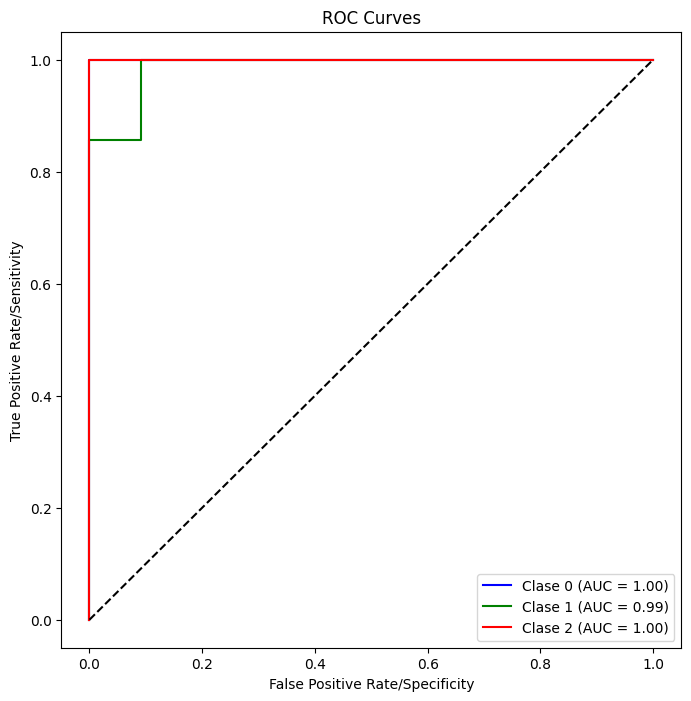

In [0]:
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])

#Se generan diccionarios para obtener los valores de la sensibilidad/recall y especificidad para la generacion de la curva ROC, ademas el calculo del area bajo la curva para determinar cuales clases esta teniendo los mejores resultados, teniendo la menor cantidad de falsos positivos y falsos negativos.
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_scores[:, i])

plt.figure(figsize=(8, 8))

colors = ['blue', 'green', 'red']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate/Specificity')
plt.ylabel('True Positive Rate/Sensitivity')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

El modelo final que se utilizo fue SVM, esto debido a la calidad de sus resultados y metricas tanto en la validacion como en el entrenamiento. Y es que, el modelo de regresion logistica tambien ofrecia buenos resultados, sin embargo con el objetivo de mejorar los resultados sin necesidad de llegar a extremos como con XGBoost, el cual es capaz de predecir a la perfeccion los valores dados. Se opto por trabajar el modelo que ofrecia una muy buena calidad de prediccion sin necesidad de rondar la perfeccion.

##Registro del modelo

In [0]:
#Registro del experimento con las respectivas metricas definidas, nombre y trazabilidad para el despliegue activo del mismo
mlflow.sklearn.autolog(log_input_examples=True, log_model_signatures=True, log_models=True)

with mlflow.start_run(run_name="SVM-model") as run:
    model = pipeline_model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.sklearn.log_model(pipeline_model, "model")

Uploading artifacts:   0%|          | 0/1 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/10 [00:00<?, ?it/s]

2024/08/23 01:09:33 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.13.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

In [0]:
#registro del modelo en MLflow para su consumo y gestion de ambientes
run_id = run.info.run_id
model_uri = f"runs:/{run_id}/model"
model_name = "prueba-model"
model_details = mlflow.register_model(model_uri=model_uri, name=model_name)

Successfully registered model 'prueba-model'.
2024/08/23 01:11:26 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: prueba-model, version 1
Created version '1' of model 'prueba-model'.


In [0]:
client = MlflowClient()
#Se define que el modelo actual estara en produccion, esto con el objetivo de respetar buenas practicas de la metodologia de MlOps
client.transition_model_version_stage(
    name=model_details.name,
    version=model_details.version,
    stage="Production"
)

/root/.ipykernel/1321/command-1598382010271315-4030629531:3: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.13.1/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1724375485839, current_stage='Production', description='', last_updated_timestamp=1724375772857, name='prueba-model', run_id='bd08f520359e4cfe9839981b77b2aaff', run_link='', source='dbfs:/databricks/mlflow-tracking/4280333186985749/bd08f520359e4cfe9839981b77b2aaff/artifacts/model', status='READY', status_message='', tags={}, user_id='4691433820215432', version='1'>

In [0]:
#Obtencion del modelo registrado para su consumo

model_version_uri = f"models:/{model_name}/1"

model_version_1 = mlflow.pyfunc.load_model(model_version_uri)

In [0]:
#Prediccion con datos nuevos
df_new_data = pd.DataFrame([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285], [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

predicted_new_values = model_version_1.predict(df_new_data)

2024/08/23 01:33:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.11/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


In [0]:
print(f"Los valores predecidos para cada muestra son respectivamente {predicted_new_values[0]} y {predicted_new_values[1]}")

Los valores predecidos para cada muestra son respectivamente 1 y 2
